# Predictive maintenance of a CNC milling machine


In machine cutting processes, in order to ensure surface finish quality, it is imperative to keep the tool used in top operative condition. One approach to monitor the machine wear is to measure certain process parameters, such as cutting force, tool vibration and acoustics emissions.


## The data source


The data was collected from a high speed CNC (computer numerical control) machine (Röders Tech RFM760) cutting stainless steel (HRC52). A platform dynamometer was used for measuring cutting force, three accelerometer was mounted to detect tool vibration in different directions, and a specialised sensor monitored the acoustic emission levels. The outputs of these sensors were captured by corresponding signal conditioning accessories.


## Experimental set-up


|                                                                                                  <img src="https://github.com/DavidRamosSal/ict_camp_predictive_maintenance/blob/main/notebooks/figures/exp_setup.png?raw=1" alt="experimental setup" width="600"/>                                                                                                  |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: |
| Experimental set-up showing sensor locations on the high speed CNC milling machine <br> (Source: **[H. Zeng, T. B. Thoe, X. Li and J. Zhou, "Multi-modal Sensing for Machine Health Monitoring in High Speed Machining"](https://ieeexplore.ieee.org/document/4053566)**) |


### Milling cutters


Milling cutters (or bits) are the changable parts of a CNC machine. These parts do the cutting or drilling of the materials handled (in this case steel). Both the hole drilling and cutting are executed by the spinning motion of these milling bits, which come in different shapes, sizes and materials.


|      ![picture showing various milling cutters ](https://github.com/DavidRamosSal/ict_camp_predictive_maintenance/blob/main/notebooks/figures/milling-bit-list.webp?raw=1)       |
| :------------------------------------------------------------------------------------------------: |
| Milling cutter examples <br> (Source: **[CNC Masters](https://www.cncmasters.com/milling-bits/)**) |


### Flutes


Flutes are the grooves formed between the teeth of a milling cutter. While the cutter rotates, the flutes direct the material chips away from the workpiece. As the tooth and flutes are identical in number (in fact, they form each other), both terms can be used interchangeably when a milling bit is described. The cutting data collected, involves milling cutters with 3 flutes.


|                             <img src="https://github.com/DavidRamosSal/ict_camp_predictive_maintenance/blob/main/notebooks/figures/flute_structure.png?raw=1" alt="picture pointing out various parts of a milling cutter" width="600"/>                              |
| :------------------------------------------------------------------------------------------------------------------------------------------------------------------------: |
| Structure of a milling cutter <br> (Source: **[Snapmaker](https://support.snapmaker.com/hc/en-us/articles/4420759543959-CNC-Router-Bits-Basics-Terms-and-Common-Types/)**) |


|                                      <img src="https://github.com/DavidRamosSal/ict_camp_predictive_maintenance/blob/main/notebooks/figures/flutes.png?raw=1" alt="picture illustrating the difference between having 2, 3 or 4 flutes on a milling bit" width="600"/>                                      |
| :--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: |
| Cross-sectional illustration of milling bits with 2, 3 and 4 flutes <br> (Source: **[Carnegie Mellon’s School of Computer Science](https://www.cs.cmu.edu/~rapidproto/students.03/zdb/project2/CNCflutes.htm)**) |


#### Dynamometer


The dynamometer is set on the machine table holding the metal workpiece, allowing it to measure forces applied to the workpiece in three dimensions.


|                                                                                                                                           <img src="https://github.com/DavidRamosSal/ict_camp_predictive_maintenance/blob/main/notebooks/figures/dynamometer.jpg?raw=1" alt="dynamometer" width="400"/>                                                                                                                                            |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: |
| Dynamometer set-up <br> (Source: **[Stachurski, Wojciech. (2018). Cutting forces during longitudinal turning process of Ti-6Al-4V ELI alloy. Theoretical and experimental values.](https://www.researchgate.net/publication/329478165_Cutting_forces_during_longitudinal_turning_process_of_Ti-6Al-4V_ELI_alloy_Theoretical_and_experimental_values)**) |


#### Accelerometer


Accelerometers are mounted on the workpiece itself and measure the vibrations felt by the workpiece.


|                                                                                         <img src="https://github.com/DavidRamosSal/ict_camp_predictive_maintenance/blob/main/notebooks/figures/accelerometer.jpg?raw=1" alt="accelerometer" width="400"/>                                                                                          |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: |
| Accelerometer set-up <br> (Source: **[Guidelines for Mounting Test Accelerometers](https://www.researchgate.net/publication/329478165_Cutting_forces_during_longitudinal_turning_process_of_Ti-6Al-4V_ELI_alloy_Theoretical_and_experimental_values)**) |


#### Acoustic Emission (AE) sensor


The acoustic emission sensor is mounted on the workpiece and detects elastic waves that go through the workpiece in events like friction, cracks and deformation.


|                                                                          <img src="https://github.com/DavidRamosSal/ict_camp_predictive_maintenance/blob/main/notebooks/figures/ae_sensor.png?raw=1" alt="AE sensor" width="400"/>                                                                           |
| :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: |
| Acoustic emission sensor set-up <br> (Source: **[Identification of tool wear using acoustic emission signal and machine learning methods](https://www.sciencedirect.com/science/article/pii/S0141635921001884)**) |


## Dataset description


The raw downloaded data is placed in the `data/raw/` directory and unziped. The data has an internal directory structure:

```
├── c1
│   ├── c1
│   │   ├── c_1_001.csv
│   │   ├── c_1_002.csv
│   │   ├── ...
│   ├── c1_wear.csv
├── c2
│   ├── c2
│   │   ├── c_2_001.csv
│   │   ├── c_2_002.csv
│   │   ├── ...
├── c3
│   ├── c3
│   │   ├── c_3_001.csv
│   │   ├── c_3_002.csv
│   │   ├── ...
├── c4
│   ├── c4
│   │   ├── c_4_001.csv
│   │   ├── c_4_002.csv
│   │   ├── ...
│   ├── c4_wear.csv
├── c5
│   ├── c5
│   │   ├── c_5_001.csv
│   │   ├── c_5_002.csv
│   │   ├── ...
├── c6
│   ├── c6
│   │   ├── c_6_001.csv
│   │   ├── c_6_002.csv
│   │   ├── ...
│   ├── c6_wear.csv

```


The data set consists of .csv (comma separated value) files. There are six individual cutter records (folders c1-c6) out of which:

- c1, c4 and c6 are for training
- c2, c3 and c5 are for testing

Each `c$number/c$number` directory corresponds to records for 315 cuts measured by the monitoring system mounted on the CNC milling machine as it removed material off a metal piece. The df the monitoring system recorded was:

- Column 1: Force (N) in X dimension
- Column 2: Force (N) in Y dimension
- Column 3: Force (N) in Z dimension
- Column 4: Vibration (g) in X dimension
- Column 5: Vibration (g) in Y dimension
- Column 6: Vibration (g) in Z dimension
- Column 7: AE-RMS (V)

For the training folders (c1,c4,c6), the wear in the flutes of the cutter in units of $10^{-3}$ mm ($\mu m$) is available in the `c$number_wear.csv` files.


## Data analysis

Two of the training folders (c1 and c4) were analyzed by the members of the team.


### Data import and preprocessing (C1)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Loading the data for a single cut in the first test


In [4]:
df_cut = pd.read_csv("/content/drive/MyDrive/ML project/c1/c1/c_1_001.csv", sep=",", header=None)

Looking for null and missing values


In [5]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127399 entries, 0 to 127398
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       127399 non-null  float64
 1   1       127399 non-null  float64
 2   2       127399 non-null  float64
 3   3       127399 non-null  float64
 4   4       127399 non-null  float64
 5   5       127399 non-null  float64
 6   6       127399 non-null  float64
dtypes: float64(7)
memory usage: 6.8 MB


Data seems to be complete because `Non-Null Count` matches the number of entries.


Taking a peek:


In [6]:
df_cut.head(10)

,0,1,2,3,4,5,6
0,0.704,-0.387,-1.084,0.018,0.031,0.027,-0.004
1,0.772,-0.573,-1.153,-0.056,-0.057,-0.058,-0.004
2,0.828,-0.673,-1.242,0.037,0.019,0.031,-0.004
3,0.866,-0.601,-1.311,-0.028,-0.027,-0.022,-0.004
4,0.910,-0.377,-1.341,-0.050,-0.049,-0.058,-0.004
5,0.896,-0.095,-1.333,0.022,0.036,0.017,-0.004
6,0.910,0.239,-1.270,-0.062,-0.038,-0.047,-0.004
7,0.900,0.614,-1.209,-0.089,-0.067,-0.070,-0.004
8,0.879,0.974,-1.137,-0.028,-0.009,0.003,-0.004
9,0.906,1.291,-1.047,-0.093,-0.082,-0.072,-0.004


Naming the columns according to the description for convenience


In [8]:
df_cut.columns = [
    "Force_X",
    "Force_Y",
    "Force_Z",
    "Vibration_X",
    "Vibration_Y",
    "Vibration_Z",
    "AE_RMS",
]

First ten rows of the data set:


In [9]:
df_cut.head(10)

,Force_X,Force_Y,Force_Z,Vibration_X,Vibration_Y,Vibration_Z,AE_RMS
0,0.704,-0.387,-1.084,0.018,0.031,0.027,-0.004
1,0.772,-0.573,-1.153,-0.056,-0.057,-0.058,-0.004
2,0.828,-0.673,-1.242,0.037,0.019,0.031,-0.004
3,0.866,-0.601,-1.311,-0.028,-0.027,-0.022,-0.004
4,0.910,-0.377,-1.341,-0.050,-0.049,-0.058,-0.004
5,0.896,-0.095,-1.333,0.022,0.036,0.017,-0.004
6,0.910,0.239,-1.270,-0.062,-0.038,-0.047,-0.004
7,0.900,0.614,-1.209,-0.089,-0.067,-0.070,-0.004
8,0.879,0.974,-1.137,-0.028,-0.009,0.003,-0.004
9,0.906,1.291,-1.047,-0.093,-0.082,-0.072,-0.004


### Signal visualization (C1)


According to the competition description, the data was acquired at a sampling rate $f = 50 KHz$. This means measurements were collected every $T = \frac{1}{f} = 0.02 \,ms $.


For the sake of clarity let's create an array that holds time in miliseconds $ms$


In [10]:
n = df_cut["Force_X"].shape[0]  # number of measurements
t = 0.02 * np.arange(n)  # time in miliseconds

Adding it to the dataframe


In [11]:
df_cut["time"] = t

### Forces


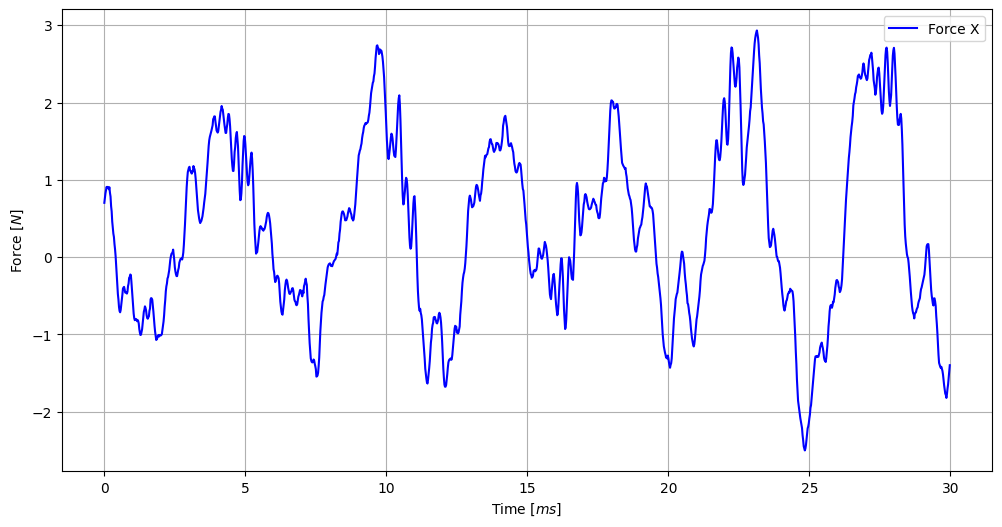

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_cut["time"][:1500], df_cut["Force_X"][:1500], label="Force X", color="b"
)  # plotting 1500 out of the total number of entries
plt.xlabel("Time [$ms$]")
plt.ylabel("Force [$N$]")
plt.grid()
plt.legend()
plt.show()

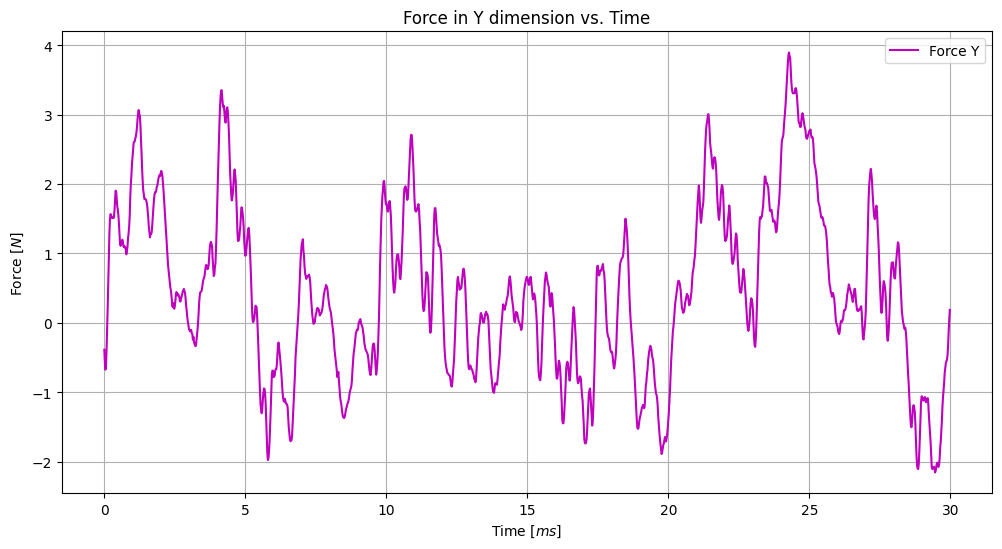

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_cut["time"][:1500], df_cut["Force_Y"][:1500], label="Force Y", color="m"
)  # plotting 1500 out of the total number of entries
plt.title("Force in Y dimension vs. Time")
plt.xlabel("Time [$ms$]")
plt.ylabel("Force [$N$]")
plt.grid()
plt.legend()
plt.show()

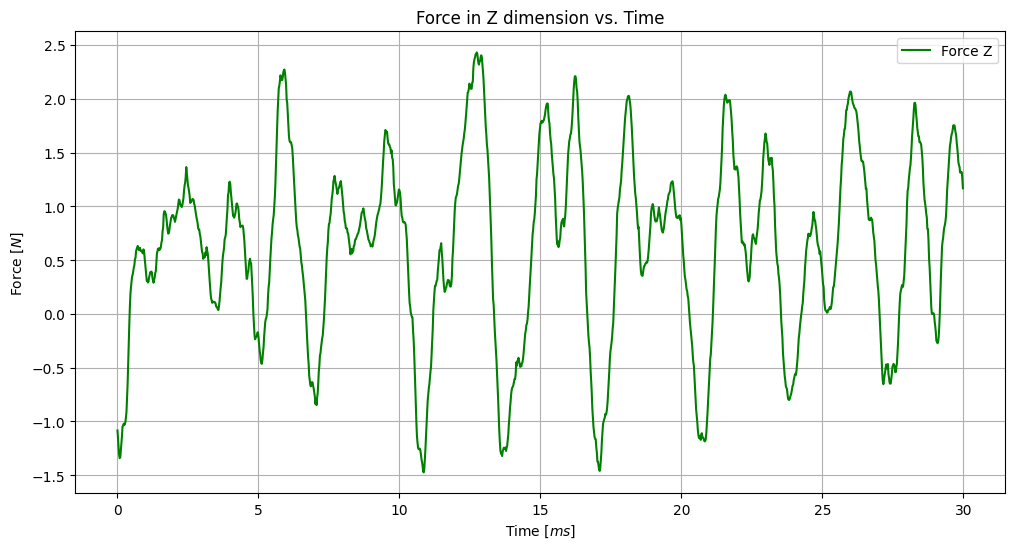

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_cut["time"][:1500], df_cut["Force_Z"][:1500], label="Force Z", color="g"
)  # plotting 1500 out of the total number of entries
plt.title("Force in Z dimension vs. Time")
plt.xlabel("Time [$ms$]")
plt.ylabel("Force [$N$]")
plt.grid()
plt.legend()
plt.show()

### Vibrations


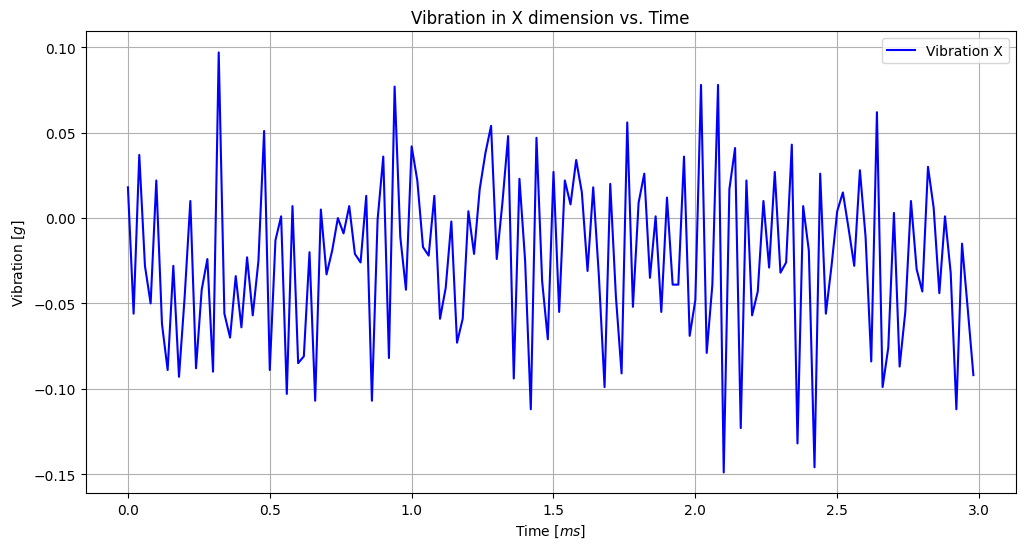

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_cut["time"][:150], df_cut["Vibration_X"][:150], label="Vibration X", color="b"
)  # plotting 150 out of the total number of entries
plt.title("Force in Z dimension vs. Time")
plt.title("Vibration in X dimension vs. Time")
plt.xlabel("Time [$ms$]")
plt.ylabel("Vibration [$g$]")
plt.grid()
plt.legend()
plt.show()

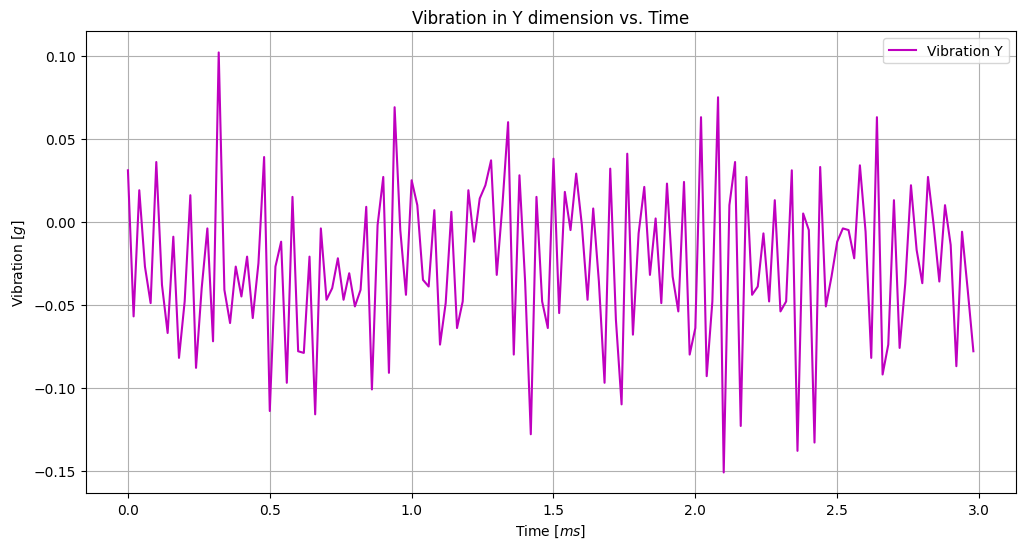

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_cut["time"][:150], df_cut["Vibration_Y"][:150], label="Vibration Y", color="m"
)  # plotting 150 out of the total number of entries
plt.title("Vibration in Y dimension vs. Time")
plt.xlabel("Time [$ms$]")
plt.ylabel("Vibration [$g$]")
plt.grid()
plt.legend()
plt.show()

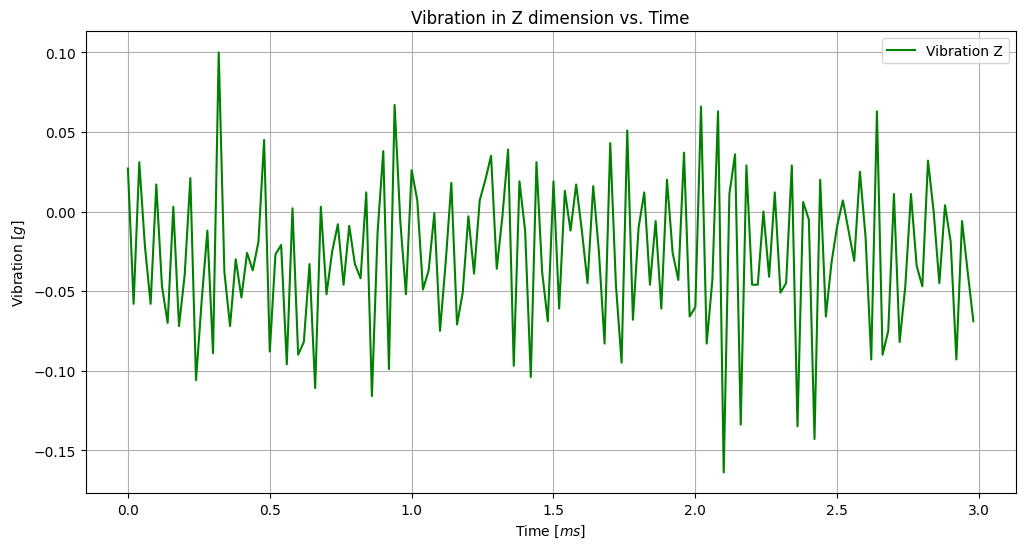

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_cut["time"][:150], df_cut["Vibration_Z"][:150], label="Vibration Z", color="g"
)  # plotting 150 out of the total number of entries
plt.title("Vibration in Z dimension vs. Time")
plt.xlabel("Time [$ms$]")
plt.ylabel("Vibration [$g$]")
plt.grid()
plt.legend()
plt.show()

### Acoustic Emission RMS


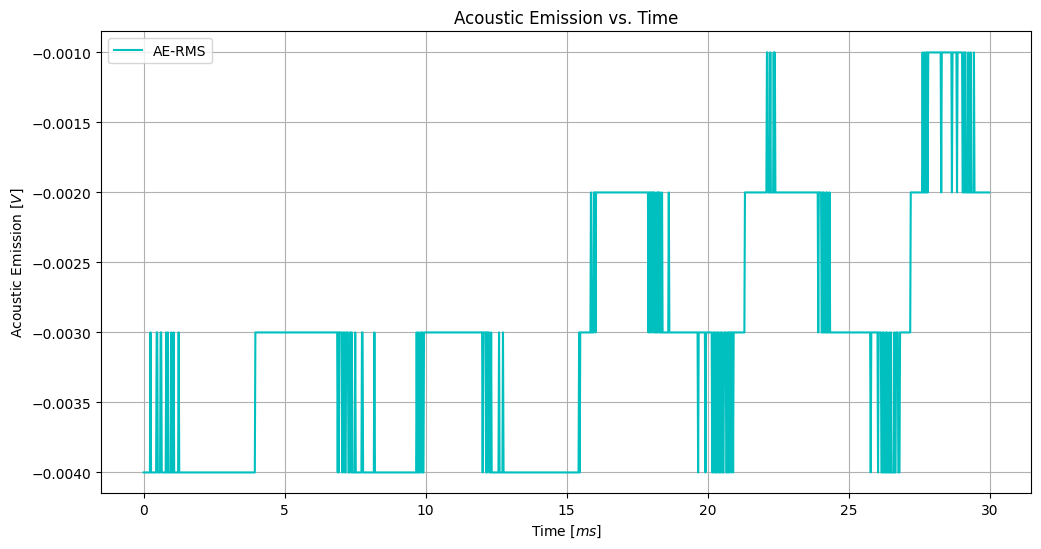

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df_cut["time"][:1500], df_cut["AE_RMS"][:1500], label="AE-RMS", color="c")
plt.title("Acoustic Emission vs. Time")
plt.xlabel("Time [$ms$]")
plt.ylabel("Acoustic Emission [$V$]")
plt.grid()
plt.legend()
plt.show()

### Wear (C1)


Loading the wear data for the first test:


In [20]:
df_wear = pd.read_csv("/content/drive/MyDrive/ML project/c1/c1_wear.csv", sep=",")

Looking for null and missing values


In [21]:
df_wear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      315 non-null    int64  
 1   flute_1  315 non-null    float64
 2   flute_2  315 non-null    float64
 3   flute_3  315 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.0 KB


Data is complete


Taking a look at the numbers


In [22]:
df_wear.head(10)

,cut,flute_1,flute_2,flute_3
0,1,32.317114,48.892617,37.720825
1,2,37.914879,49.570815,37.720825
2,3,43.087910,50.302867,37.720825
3,4,47.859072,51.083652,37.849851
4,5,52.250329,51.908288,38.172665
5,6,56.282766,52.772127,38.617556
6,7,59.976616,53.670745,39.174556
7,8,63.351288,54.599939,39.834155
8,9,66.425391,55.555716,40.587292
9,10,69.216757,56.534286,41.425337


Plotting the wear as the number of cuts increases


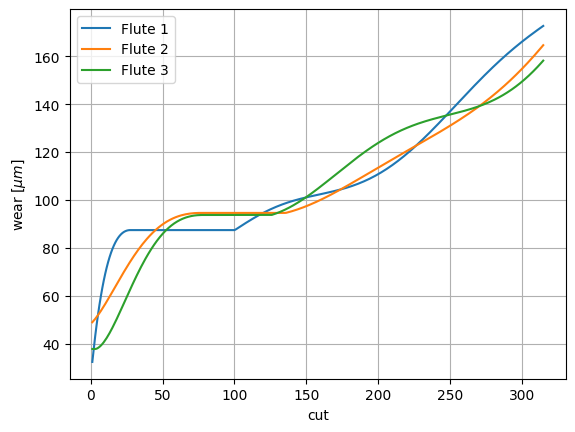

In [23]:
plt.plot(df_wear["cut"], df_wear["flute_1"], label="Flute 1")
plt.plot(df_wear["cut"], df_wear["flute_2"], label="Flute 2")
plt.plot(df_wear["cut"], df_wear["flute_3"], label="Flute 3")
plt.xlabel(r"cut")
plt.ylabel(r"wear $[\mu m]$")
plt.grid()
plt.legend()
plt.show()

## Evolution of the signals with the cutting process


Going through all the cut files in the c1 folder and calculating the average of each quantity for each cut


In [30]:
import os

folder_path = "/content/drive/MyDrive/ML project/c1/c1"

means_list = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df_cut_temp = pd.read_csv(folder_path + "/" + filename, sep=",", header=None)
        df_cut_temp.columns = [
            "Force_X",
            "Force_Y",
            "Force_Z",
            "Vibration_X",
            "Vibration_Y",
            "Vibration_Z",
            "AE_RMS",
        ]
        means = df_cut_temp.mean()
        means_list.append(means)
df_means = pd.DataFrame(pd.concat(means_list, axis=1)).T

In [31]:
df_means

,Force_X,Force_Y,Force_Z,Vibration_X,Vibration_Y,Vibration_Z,AE_RMS
0,1.776092,2.347886,1.833988,-0.004907,-0.009859,-0.011773,0.066571
1,1.028151,1.118580,1.024095,-0.003230,-0.010850,-0.012855,0.038556
2,0.400857,0.629463,0.705132,0.009307,0.013556,0.018200,-0.000060
3,2.104920,2.721446,2.024514,-0.001283,-0.004831,-0.005907,0.080003
4,3.016910,2.443147,1.274427,-0.008552,-0.014362,-0.018442,0.102949
...,...,...,...,...,...,...,...
310,16.794388,7.645602,10.169025,0.000089,-0.001534,-0.001967,0.173970
311,15.121603,7.684082,9.446427,0.000383,-0.003116,-0.003614,0.217491
312,17.553217,7.597779,10.685903,0.000687,-0.002461,-0.002946,0.240730
313,19.879313,8.603225,12.125164,0.000350,-0.002997,-0.003485,0.247884


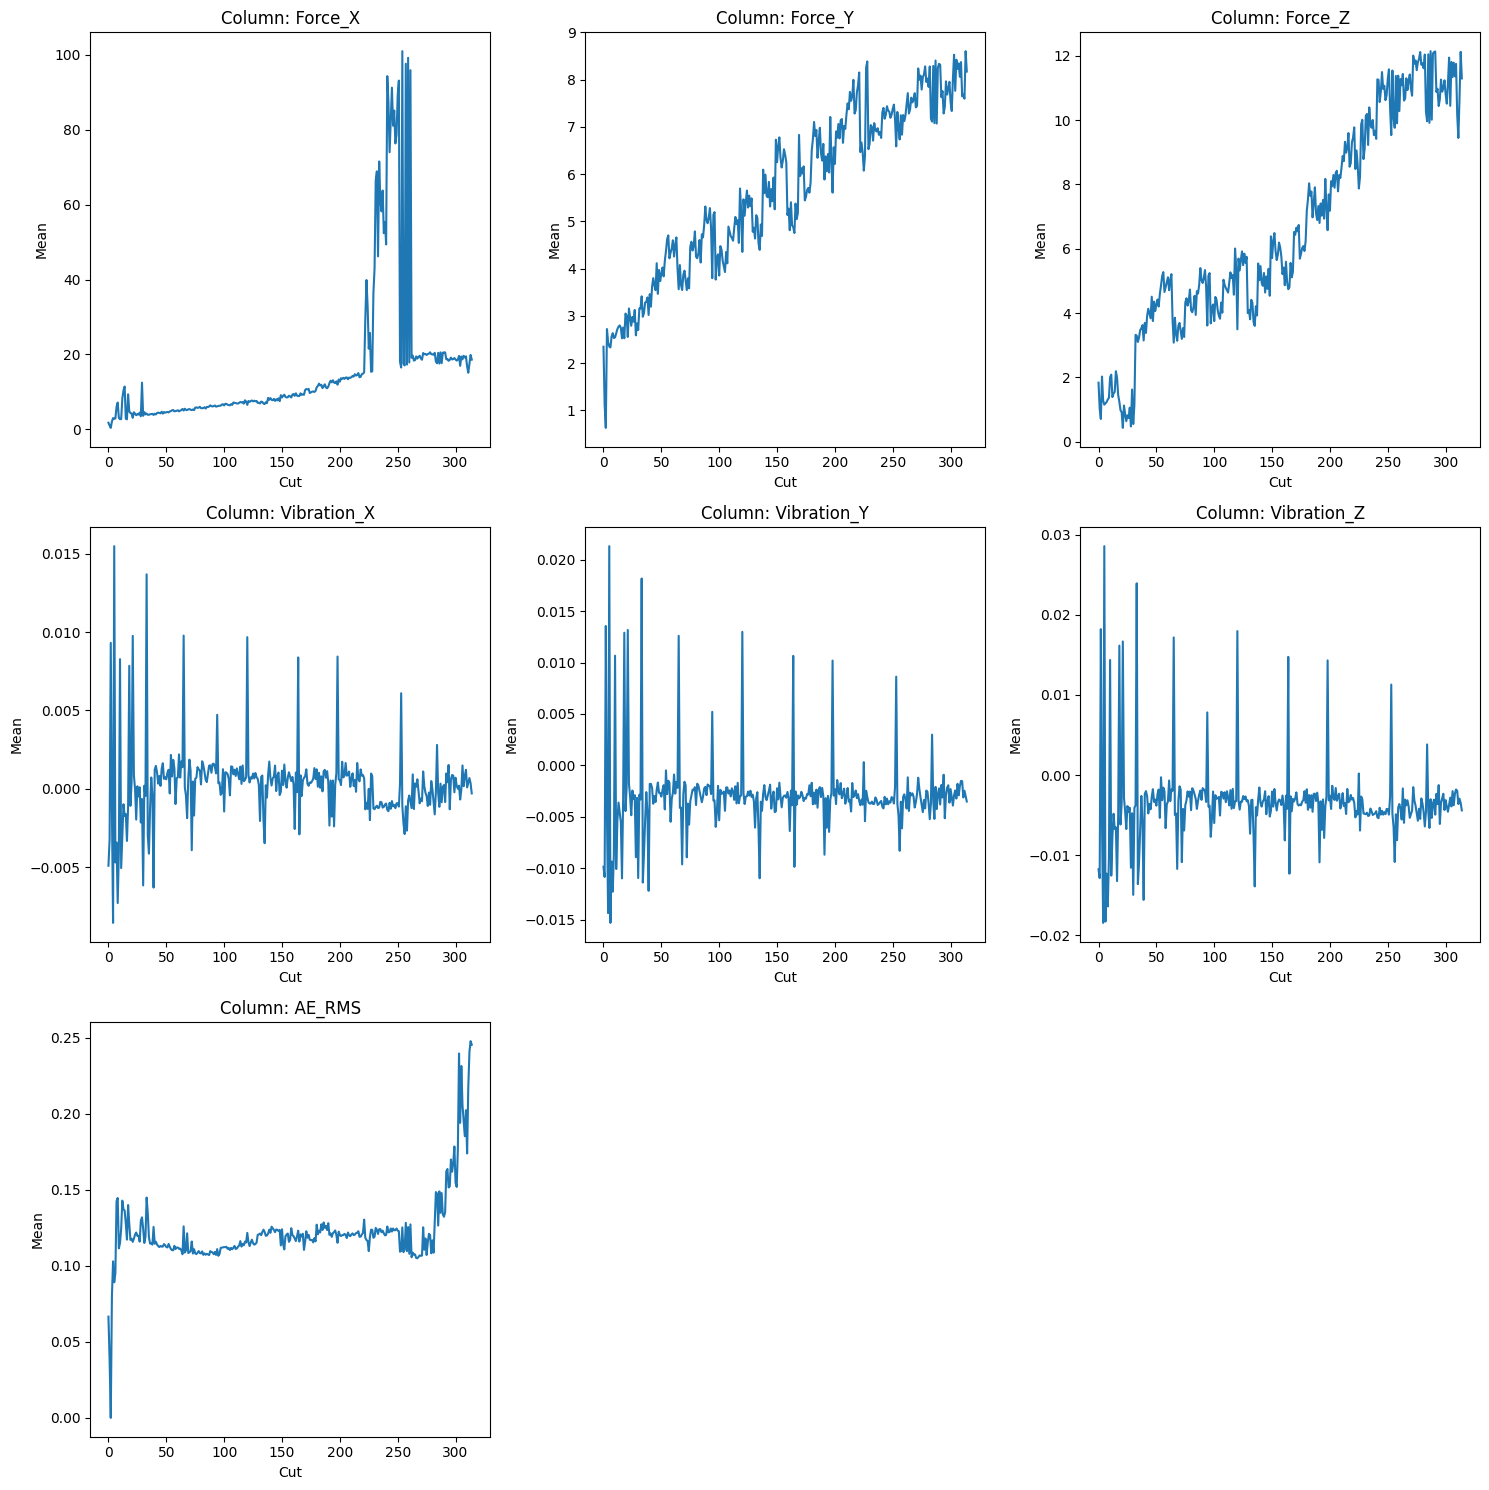

In [32]:
# Generated by ChatGPT
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array to easily iterate
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(df_means.columns):
    axes[i].plot(df_means.index, df_means[column])
    axes[i].set_title(f"Column: {column}")
    axes[i].set_xlabel("Cut")
    axes[i].set_ylabel("Mean")

# Hide any remaining empty subplots if there are less than 9 columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Forces:** From these plots it can be seen that, overall, forces measured increase as the number of cuts increases, that is as the wear on the milling bit increases. Furthermore Force_X presents an abrupt increase on the measurements around cut 240. This deserves to be compared with the other of dataset samples.

**Vibrations:** The mean of the vibrations is almost zero, further analysis (rms for example) is required.

**Acoustic Emision:** Vibrations increased after some cuts, stayed constant and increased towards the end, presumably due to increased wear of the milling bit, worth comparing to the other sets.


### Correlations


To quantify the possible correlations between the variables and the wear described above, we can calculate a correlation matrix.


Let's join the dataset means and the measured wear into a single pandas dataframe


In [33]:
df_mean_wear = pd.concat([df_means, df_wear[["flute_1", "flute_2", "flute_3"]]], axis=1)

In [34]:
df_mean_wear

,Force_X,Force_Y,Force_Z,Vibration_X,Vibration_Y,Vibration_Z,AE_RMS,flute_1,flute_2,flute_3
0,1.776092,2.347886,1.833988,-0.004907,-0.009859,-0.011773,0.066571,32.317114,48.892617,37.720825
1,1.028151,1.118580,1.024095,-0.003230,-0.010850,-0.012855,0.038556,37.914879,49.570815,37.720825
2,0.400857,0.629463,0.705132,0.009307,0.013556,0.018200,-0.000060,43.087910,50.302867,37.720825
3,2.104920,2.721446,2.024514,-0.001283,-0.004831,-0.005907,0.080003,47.859072,51.083652,37.849851
4,3.016910,2.443147,1.274427,-0.008552,-0.014362,-0.018442,0.102949,52.250329,51.908288,38.172665
...,...,...,...,...,...,...,...,...,...,...
310,16.794388,7.645602,10.169025,0.000089,-0.001534,-0.001967,0.173970,170.981042,161.824508,155.546719
311,15.121603,7.684082,9.446427,0.000383,-0.003116,-0.003614,0.217491,171.411854,162.517989,156.189184
312,17.553217,7.597779,10.685903,0.000687,-0.002461,-0.002946,0.240730,171.839631,163.218075,156.844309
313,19.879313,8.603225,12.125164,0.000350,-0.002997,-0.003485,0.247884,172.264561,163.924726,157.512083


With this we can simply calculate the correlation using pandas


In [35]:
correlation_matrix = df_mean_wear.corr()

<Figure size 1200x800 with 0 Axes>

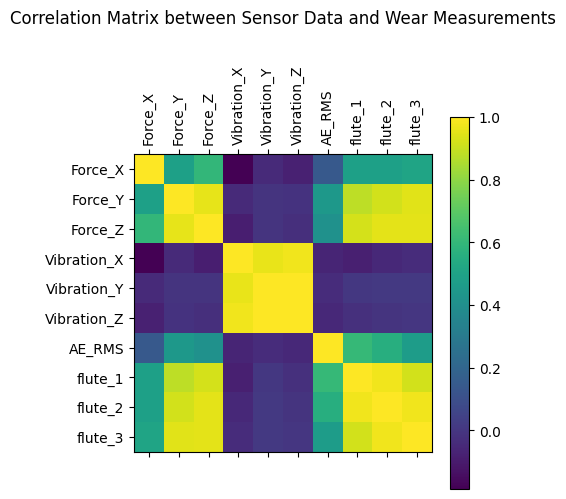

In [38]:
# Generated by ChatGPT

plt.figure(figsize=(12, 8))

plt.matshow(correlation_matrix, cmap="viridis")

plt.colorbar()

plt.xticks(
    range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90
)

plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix between Sensor Data and Wear Measurements", pad=30)

plt.show()

From this plot we see that in the first dataset the mean of Force_Y and Force_Z seem to have a strong correlation with the wear on each flute. This is good news, as it suggests linear modeling might give good results.


## Frequency domain analysis


### Fourier transform of force


In [39]:
from scipy import fft, signal

In [40]:
y = np.asarray(df_cut["Force_X"])

In [41]:
yf = fft.fft(y)
xf = fft.fftfreq(len(y), d=1 / 50000)

[]

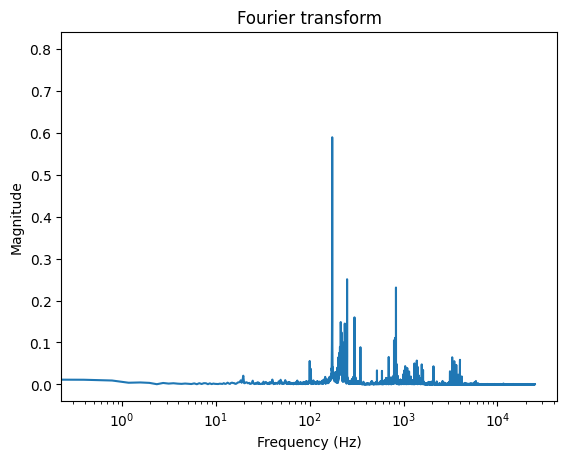

In [42]:
plt.plot(xf[0 : n // 2], 2.0 / n * np.abs(yf[0 : n // 2]))
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier transform")
plt.plot()

### Wavelet transform


In [43]:
import pywt

In [44]:
sampling_frequency = 50000  # 50 KHz

time = np.arange(len(y)) / sampling_frequency


# Define the wavelet and scales for CWT

wavelet = "cmor1.5-1.0"  # Complex Morlet wavelet

center_frequency = 0.8


sampling_period = 1 / sampling_frequency


# Select scales based on the observed FFT frequencies

dominant_frequencies = np.linspace(1, 2000, num=200)

scales = center_frequency / (dominant_frequencies * sampling_period)


coefficients, frequencies = pywt.cwt(
    y, scales, wavelet, sampling_period=sampling_period
)

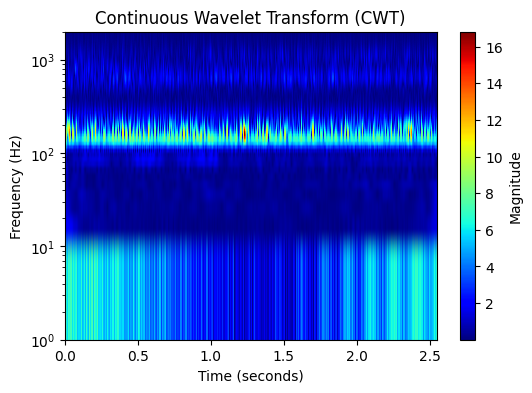

In [46]:
plt.figure(figsize=(6, 4))

plt.imshow(
    np.abs(coefficients),
    extent=[time[0], time[-1], dominant_frequencies[-1], dominant_frequencies[0]],
    aspect="auto",
    cmap="jet",
)

plt.colorbar(label="Magnitude")

plt.title("Continuous Wavelet Transform (CWT)")

plt.xlabel("Time (seconds)")

plt.ylabel("Frequency (Hz)")

plt.yscale("log")

plt.gca().invert_yaxis()

plt.show()

Turning this into a helper function to analyze different cuts (the function takes a while to run)


In [47]:
def frequency_analysis(data_path, feature="Force_X"):
    df = pd.read_csv(data_path, sep=",", header=None)

    df.columns = [
        "Force_X",
        "Force_Y",
        "Force_Z",
        "Vibration_X",
        "Vibration_Y",
        "Vibration_Z",
        "AE_RMS",
    ]

    y = np.asarray(df[feature])

    # FFT

    yf = fft.fft(y)

    xf = fft.fftfreq(len(y), d=1 / 50000)

    sampling_frequency = 50000  # 50 KHz

    time = np.arange(len(y)) / sampling_frequency

    # Wavelet

    wavelet = "cmor1.5-1.0"

    center_frequency = 0.8

    sampling_period = 1 / sampling_frequency

    dominant_frequencies = np.linspace(1, 2000, num=300)

    scales = center_frequency / (dominant_frequencies * sampling_period)

    coefficients, frequencies = pywt.cwt(
        y, scales, wavelet, sampling_period=sampling_period
    )

    fig, axs = plt.subplots(2, 1, figsize=(5, 7))

    # FFT plot
    axs[0].plot(xf[0 : n // 2], 2.0 / n * np.abs(yf[0 : n // 2]))
    axs[0].set_xlabel("Frequency (Hz)")
    axs[0].set_title("Fourier Transform")
    axs[0].set_xscale("log")

    # wavelet plot

    plt.imshow(
        np.abs(coefficients),
        extent=[time[0], time[-1], dominant_frequencies[-1], dominant_frequencies[0]],
        aspect="auto",
        cmap="jet",
    )

    plt.colorbar(label="Magnitude")

    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Frequency (Hz)")
    axs[1].set_title("Continuous Wavelet Transform (Scaleogram)")
    axs[1].set_yscale("log")
    plt.gca().invert_yaxis()

    plt.tight_layout()

    return fig

Let's analyse the frequency spectrum at different points of the cutting process, signals from cuts 1, 10, 100 and 300.


### F_X


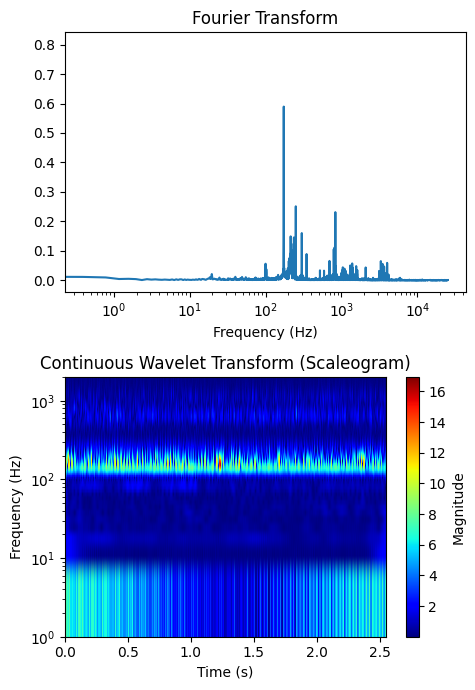

In [49]:
f_analysis_cut_01 = frequency_analysis(
    "/content/drive/MyDrive/ML project/c1/c1/c_1_001.csv", feature="Force_X"
)

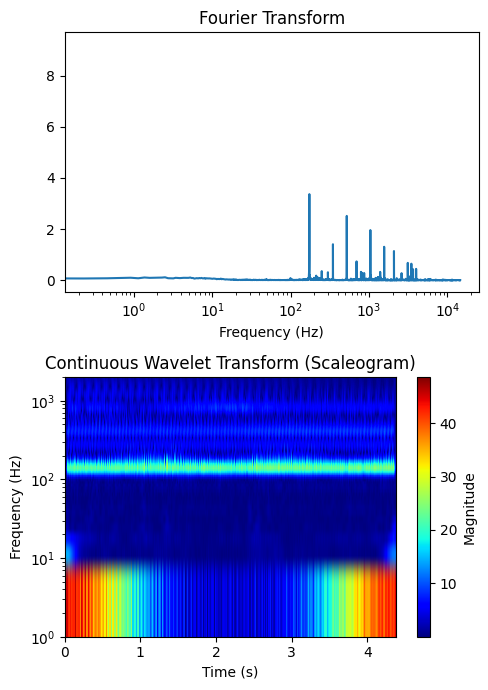

In [50]:
f_analysis_cut_10 = frequency_analysis(
    "/content/drive/MyDrive/ML project/c1/c1/c_1_010.csv", feature="Force_X"
)

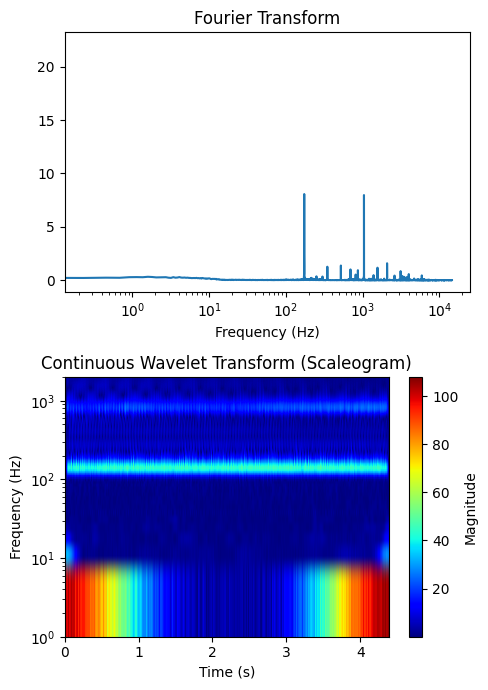

In [52]:
f_analysis_cut_100 = frequency_analysis(
    "/content/drive/MyDrive/ML project/c1/c1/c_1_100.csv", feature="Force_X"
)

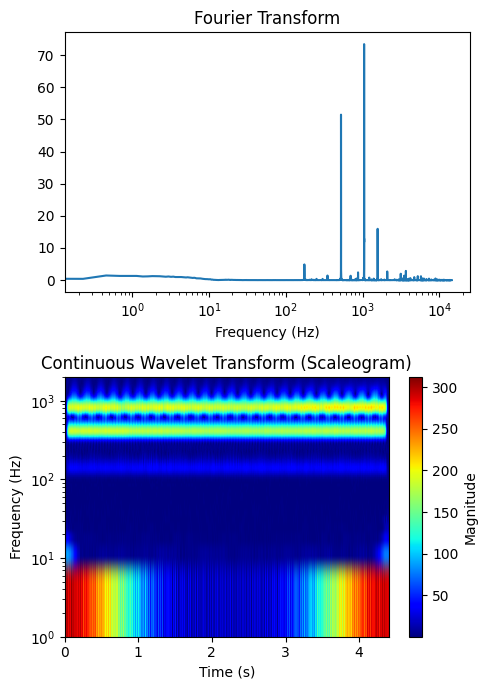

In [53]:
f_analysis_cut_300 = frequency_analysis(
    "/content/drive/MyDrive/ML project/c1/c1/c_1_300.csv", feature="Force_X"
)

From these diagrams we can note some things:

- Low frequencies (0-10 Hz): these components of the signal are very dominant at the beginning and end stages of the cut process. This is possibly due to slow oscillations caused by the milling bit engaging or realeasing the material.
- Mid frequencies (~100 Hz): present all through the cut process there is a component somewhere around 100-200 Hz, this activity matches the frequency of the milling bit: 10400 rpm ~ 170 Hz.
- High frequencies (100-1000 Hz): activity is this frequency incrased with the amount of cuts, this might be a sign of wear.


### F_y


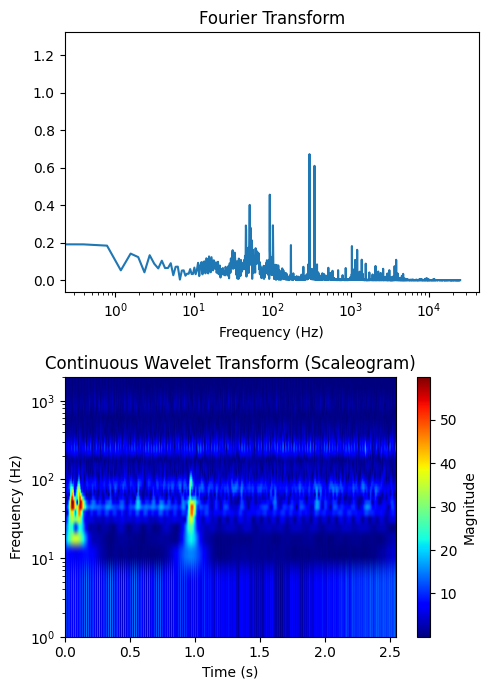

In [54]:
f_analysis_cut_1 = frequency_analysis(
    "/content/drive/MyDrive/ML project/c1/c1/c_1_001.csv", feature="Force_Y"
)

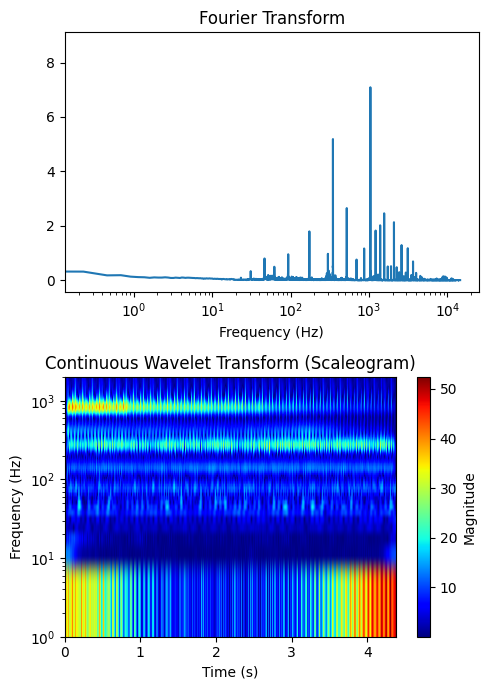

In [55]:
f_analysis_cut_10 = frequency_analysis(
    "/content/drive/MyDrive/ML project/c1/c1/c_1_010.csv", feature="Force_Y"
)

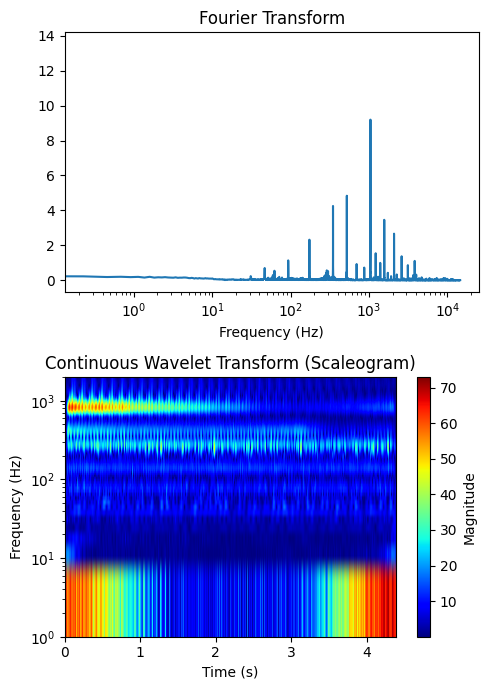

In [56]:
f_analysis_cut_100 = frequency_analysis(
    "/content/drive/MyDrive/ML project/c1/c1/c_1_100.csv", feature="Force_Y"
)

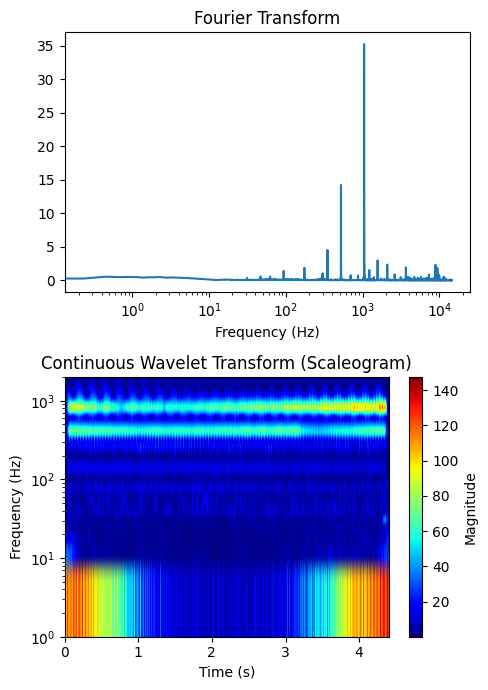

In [57]:
f_analysis_cut_300 = frequency_analysis(
    "/content/drive/MyDrive/ML project/c1/c1/c_1_300.csv", feature="Force_Y"
)

While low and high frequency behavior is similar than that of F_X, the middle frequency range is much more complex. Interestingly however, during the first cut an anomality is observed in the middle range frequency range.


From this frequency analysis we can see that time-frequency features are useful to describe the cutting process and they are potentially valuable when creating a predictive machine learning model.


### Data import and preprocessing (C4)


Loading data for a single cut in the 4th cutting record set


In [58]:
data_cut = pd.read_csv(
    "/content/drive/MyDrive/ML project/c4/c4/c_4_001.csv", sep=",", header=None
)

Checking data for null or missing values:


In [59]:
data_cut.isnull()

,0,1,2,3,4,5,6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
165592,False,False,False,False,False,False,False
165593,False,False,False,False,False,False,False
165594,False,False,False,False,False,False,False
165595,False,False,False,False,False,False,False


In [60]:
data_cut.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


Based on the results, no "null" or missing data were detected in the file.


In [61]:
data_cut.columns = [
    "Force X",
    "Force Y",
    "Force Z",
    "Vibration X",
    "Vibration Y",
    "Vibration Z",
    "AE-RMS",
]
data_cut.head(10)

,Force X,Force Y,Force Z,Vibration X,Vibration Y,Vibration Z,AE-RMS
0,0.916,4.370,-1.372,0.102,0.041,0.069,0.018
1,0.892,3.955,-1.277,0.015,-0.099,-0.066,0.018
2,0.908,3.334,-1.193,0.033,-0.098,-0.059,0.018
3,1.013,3.022,-1.082,0.151,0.015,0.035,0.018
4,1.111,2.970,-1.103,-0.048,-0.175,-0.171,0.019
5,1.302,3.043,-1.089,0.011,-0.085,-0.097,0.018
6,1.552,3.017,-1.052,0.066,-0.002,-0.036,0.019
7,1.832,2.796,-0.933,0.002,-0.028,-0.075,0.019
8,2.127,2.521,-0.749,0.011,0.041,-0.022,0.019
9,2.354,2.311,-0.623,-0.038,0.012,-0.056,0.019


### Visualisation of signal types


According to the competition description, measurements were aquired every 0.02 ms.


In [62]:
# Sampling interval in seconds (0.02 ms = 0.00002 seconds)
sampling_interval = 0.00002
num_measurements = len(data_cut)
time = np.arange(0, num_measurements * sampling_interval, sampling_interval)
data_cut["time"] = time

### Force measured


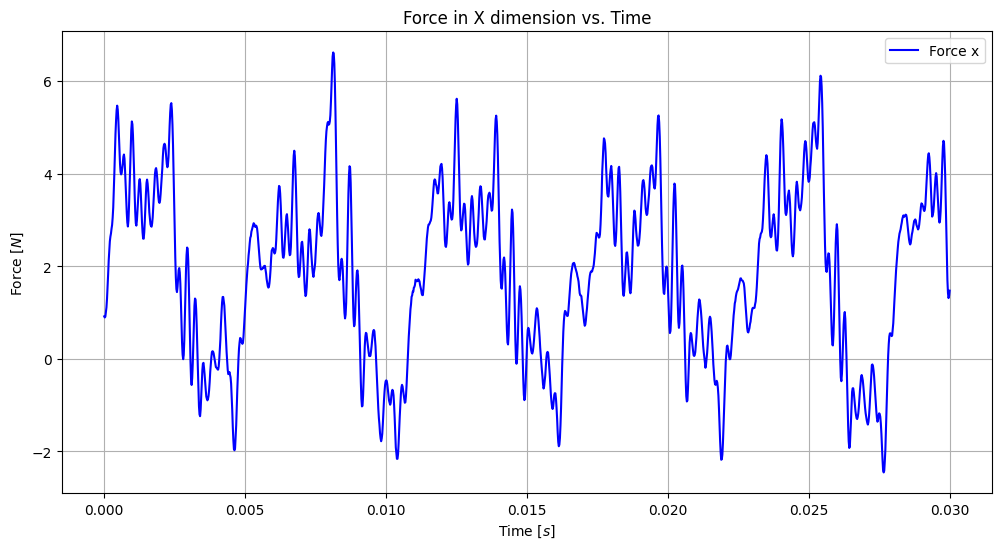

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(
    data_cut["time"][:1500], data_cut["Force X"][:1500], label="Force x", color="b"
)
plt.title("Force in X dimension vs. Time")
plt.xlabel("Time [$s$]")
plt.ylabel("Force [$N$]")
plt.grid()
plt.legend()
plt.show()

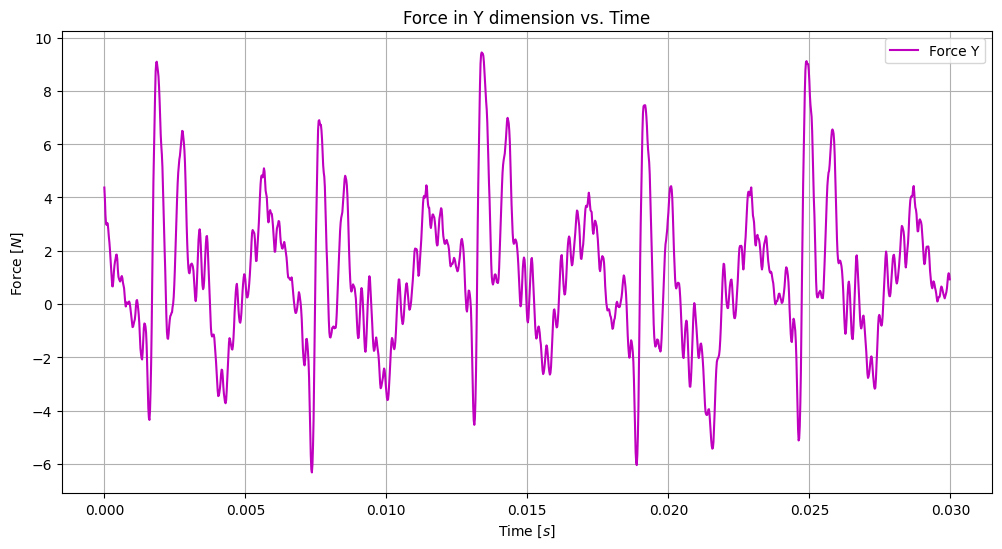

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(
    data_cut["time"][:1500], data_cut["Force Y"][:1500], label="Force Y", color="m"
)
plt.title("Force in Y dimension vs. Time")
plt.xlabel("Time [$s$]")
plt.ylabel("Force [$N$]")
plt.grid()
plt.legend()
plt.show()

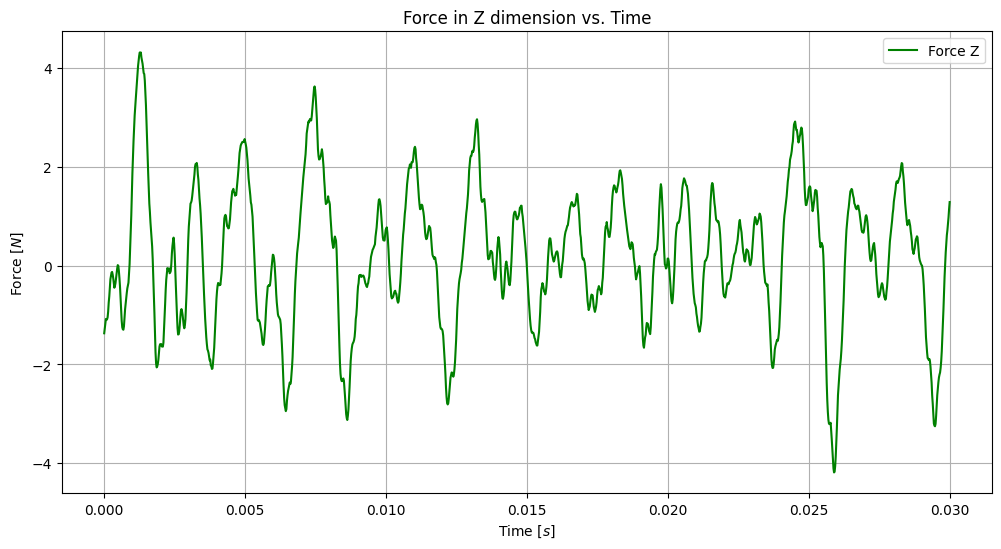

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(
    data_cut["time"][:1500], data_cut["Force Z"][:1500], label="Force Z", color="g"
)
plt.title("Force in Z dimension vs. Time")
plt.xlabel("Time [$s$]")
plt.ylabel("Force [$N$]")
plt.grid()
plt.legend()
plt.show()

### Vibration measured


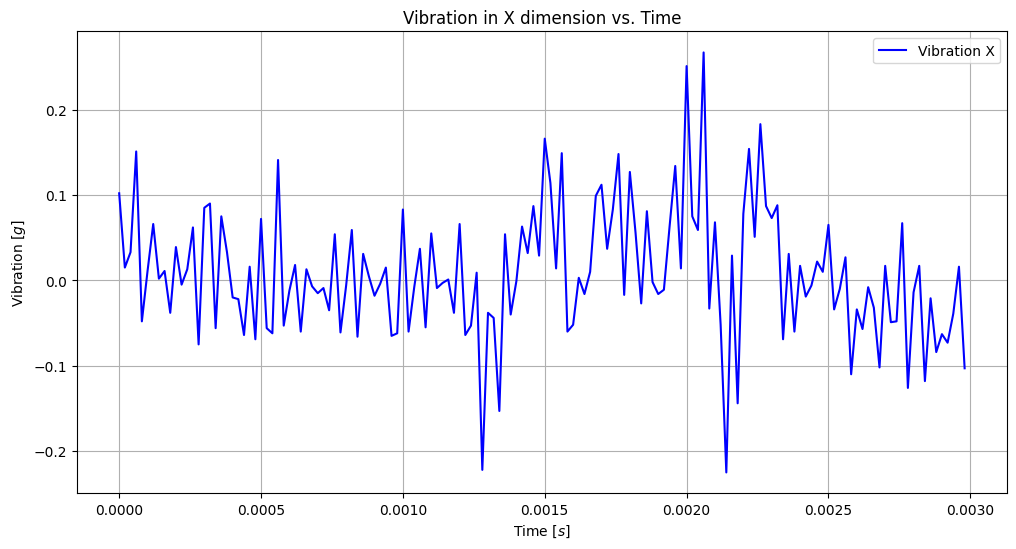

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(
    data_cut["time"][:150],
    data_cut["Vibration X"][:150],
    label="Vibration X",
    color="b",
)
plt.title("Vibration in X dimension vs. Time")
plt.xlabel("Time [$s$]")
plt.ylabel("Vibration [$g$]")
plt.grid()
plt.legend()
plt.show()

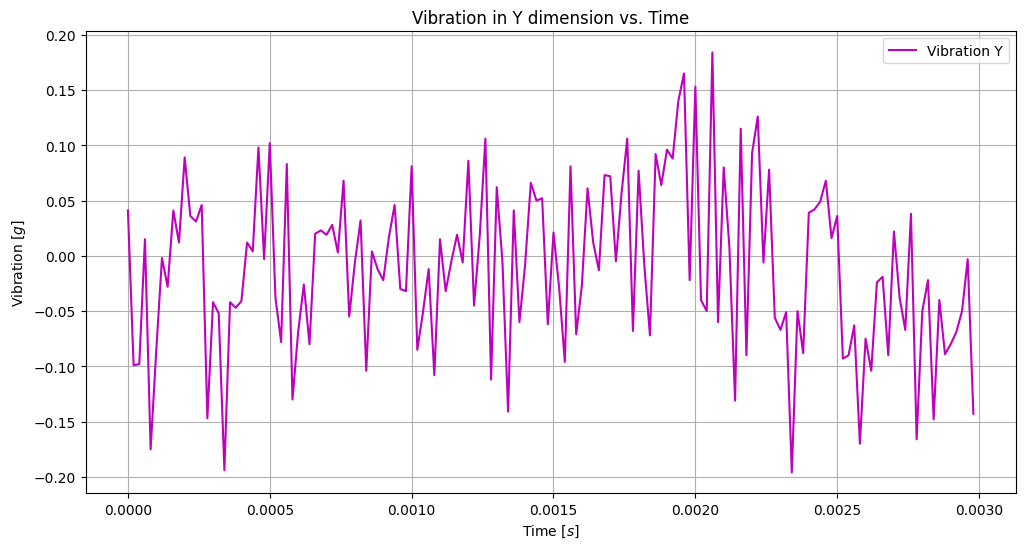

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(
    data_cut["time"][:150],
    data_cut["Vibration Y"][:150],
    label="Vibration Y",
    color="m",
)
plt.title("Vibration in Y dimension vs. Time")
plt.xlabel("Time [$s$]")
plt.ylabel("Vibration [$g$]")
plt.grid()
plt.legend()
plt.show()

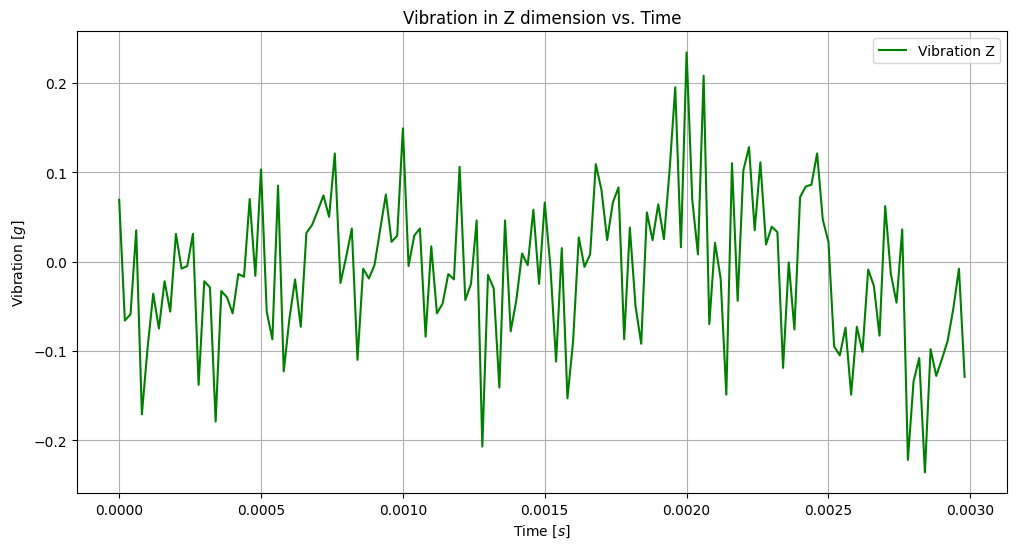

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(
    data_cut["time"][:150],
    data_cut["Vibration Z"][:150],
    label="Vibration Z",
    color="g",
)
plt.title("Vibration in Z dimension vs. Time")
plt.xlabel("Time [$s$]")
plt.ylabel("Vibration [$g$]")
plt.grid()
plt.legend()
plt.show()

### Acoustic emission measured


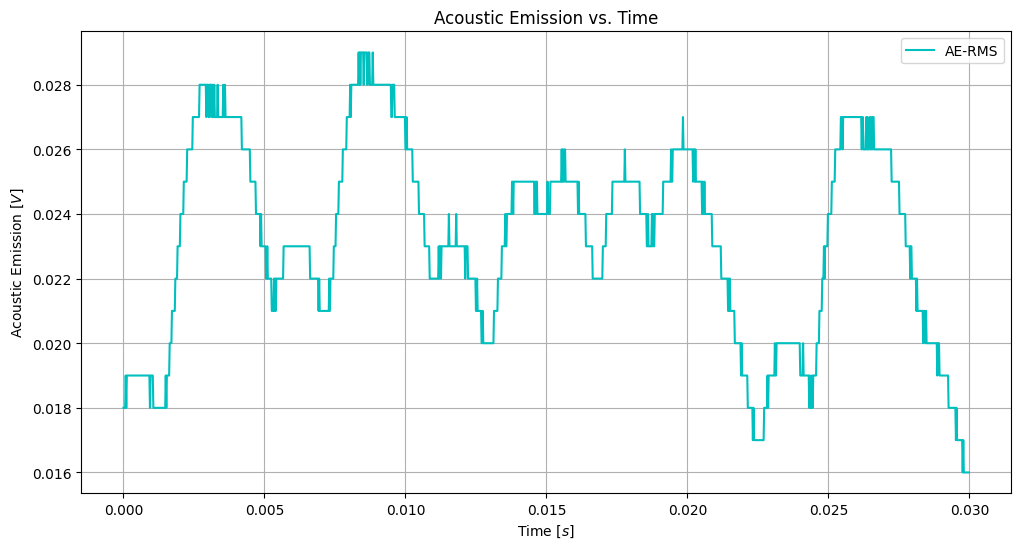

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(data_cut["time"][:1500], data_cut["AE-RMS"][:1500], label="AE-RMS", color="c")
plt.title("Acoustic Emission vs. Time")
plt.xlabel("Time [$s$]")
plt.ylabel("Acoustic Emission [$V$]")
plt.grid()
plt.legend()
plt.show()

### Importing and preprocessing of wear data


Loading wear data for the 4th cutting record set:


In [70]:
data_wear = pd.read_csv("/content/drive/MyDrive/ML project/c4/c4_wear.csv", sep=",")

Checking wear data for null or missing values:


In [71]:
data_wear.isnull()

,cut,flute_1,flute_2,flute_3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
310,False,False,False,False
311,False,False,False,False
312,False,False,False,False
313,False,False,False,False


In [72]:
data_wear.isnull().sum()

,0
cut,0
flute_1,0
flute_2,0
flute_3,0


Based on the results, no "null" or missing data were detected in the file.


First 10 rows of the wear data:


In [73]:
data_wear.head(10)

,cut,flute_1,flute_2,flute_3
0,1,31.416355,19.483692,21.748063
1,2,34.892770,23.473047,24.925960
2,3,38.102847,27.172868,27.898659
3,4,41.061023,30.599309,30.677848
4,5,43.781191,33.767870,33.274721
5,6,46.276710,36.693424,35.699993
6,7,48.560421,39.390229,37.963919
7,8,50.644660,41.871953,40.076300
8,9,52.541276,44.151684,42.046507
9,10,54.261641,46.241954,43.883488


## Visualization of wear data


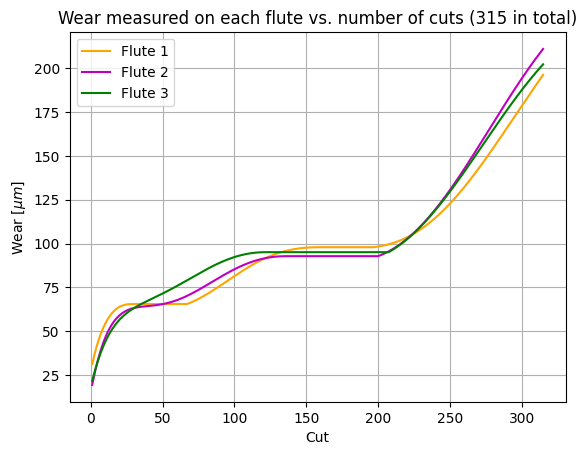

In [74]:
plt.plot(data_wear["cut"], data_wear["flute_1"], label="Flute 1", color="orange")
plt.plot(data_wear["cut"], data_wear["flute_2"], label="Flute 2", color="m")
plt.plot(data_wear["cut"], data_wear["flute_3"], label="Flute 3", color="g")
plt.title("Wear measured on each flute vs. number of cuts (315 in total)")
plt.xlabel("Cut")
plt.ylabel(r"Wear $[\mu m]$")
plt.grid()
plt.legend()
plt.show()

The behaviour of the signals and wear measurements is similar to the first dataset(C1). In the next notebook we will extract features from the raw signal data.


In [75]:
import pandas as pd
import pywt
import numpy as np
from scipy.stats import skew, kurtosis, entropy
import os

# Silences pandas warning that ruin the display of the notebook on github
from warnings import simplefilter

simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [78]:
def extract_features(file_path):
    df = pd.read_csv(file_path, sep=",")
    df.columns = [
        "force_x",
        "force_y",
        "force_z",
        "vibration_x",
        "vibration_y",
        "vibration_z",
        "ae_rms",
    ]
    features = {}
    for column in df.columns:
        col_data = df[column]
        features[column + "_min"] = col_data.min()
        features[column + "_max"] = col_data.max()
        features[column + "_mean"] = col_data.mean()
        features[column + "_std"] = col_data.std()
        features[column + "_skew"] = skew(col_data)
        features[column + "_kurtosis"] = kurtosis(col_data)
        features[column + "_energy"] = np.sum(np.square(col_data))
        features[column + "_entropy"] = entropy(np.abs(col_data) / np.sum(col_data))
        features[column + "_zero_crossings"] = np.sum(np.diff(np.sign(col_data)) != 0)

        coeffs = pywt.wavedec(df[column], "db4", level=8)
        for i, coeff in enumerate(coeffs[0:5]):
            features[column + "_band_" + str(i) + "_min"] = np.min(coeff)
            features[column + "_band_" + str(i) + "_max"] = np.max(coeff)
            features[column + "_band_" + str(i) + "_mean"] = np.mean(coeff)
            features[column + "_band_" + str(i) + "_std"] = np.std(coeff)
            features[column + "_band_" + str(i) + "_skew"] = skew(coeff)
            features[column + "_band_" + str(i) + "_kurtosis"] = kurtosis(coeff)
            features[column + "_band_" + str(i) + "_energy"] = np.sum(np.square(coeff))
            features[column + "_band_" + str(i) + "_entropy"] = entropy(
                np.abs(coeff) / np.sum(coeff)
            )
            features[column + "_band_" + str(i) + "_zero_crossings"] = np.sum(
                np.diff(np.sign(coeff)) != 0
            )

    return pd.DataFrame([features])

In [80]:
folder_path = "/content/drive/MyDrive/ML project/c1/c1"

df_list = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df_list.append(extract_features(folder_path + "/" + filename))

df_features_full = pd.concat(df_list, ignore_index=True)

In [81]:
df_features_full

,force_x_min,force_x_max,force_x_mean,force_x_std,force_x_skew,force_x_kurtosis,force_x_energy,force_x_entropy,force_x_zero_crossings,force_x_band_0_min,...,ae_rms_band_3_zero_crossings,ae_rms_band_4_min,ae_rms_band_4_max,ae_rms_band_4_mean,ae_rms_band_4_std,ae_rms_band_4_skew,ae_rms_band_4_kurtosis,ae_rms_band_4_energy,ae_rms_band_4_entropy,ae_rms_band_4_zero_crossings
0,-5.994,11.534,1.776100,2.672098,0.605039,0.073306,2.248208e+06,11.936780,7446,0.016538,...,2273,-0.009216,0.021860,0.000030,0.002584,0.879653,2.244280,0.045633,8.505429,4478
1,-4.219,8.427,1.028156,1.864984,0.606318,0.022628,9.854836e+05,11.912433,7897,-5.805412,...,2278,-0.006229,0.017295,0.000023,0.001936,1.052757,3.416955,0.025474,8.425849,4374
2,-2.501,3.744,0.400855,0.842474,0.115213,-0.245204,1.108925e+05,11.470652,3086,3.372719,...,1263,-0.003087,0.002905,-0.000012,0.000750,0.148335,0.173608,0.002242,7.991690,2476
3,-6.157,11.788,2.104932,2.992563,0.586797,0.102543,2.928016e+06,11.947874,7116,-4.159454,...,2282,-0.017264,0.031650,0.000003,0.003155,0.941339,3.642558,0.068113,8.495699,4525
4,-4.910,13.014,3.016924,3.015806,0.574435,0.006707,3.985570e+06,11.994900,5888,3.461129,...,2285,-0.019224,0.025315,-0.000006,0.003917,0.789764,2.114131,0.105091,8.479461,4523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,-74.698,123.780,16.794456,46.305406,0.134983,-0.796870,6.185519e+08,12.084315,10793,-22.183492,...,2663,-0.021341,0.027049,0.000028,0.005335,0.641689,1.204890,0.226968,8.589770,5183
311,-71.236,118.640,15.121663,44.347151,0.140981,-0.823383,5.543002e+08,12.089086,10710,-25.821305,...,2643,-0.023133,0.033814,-0.000007,0.006446,0.618750,0.779751,0.328167,8.618754,5165
312,-70.778,117.770,17.553296,47.091621,-0.007970,-1.052196,5.531372e+08,12.059934,9143,-5.750263,...,2278,-0.022553,0.031956,0.000070,0.006635,0.556917,0.476263,0.301617,8.552242,4547
313,-76.741,127.270,19.879400,51.393585,-0.042143,-1.040532,6.469066e+08,12.031442,8891,4.396167,...,2217,-0.024646,0.040724,-0.000016,0.006923,0.604330,0.429033,0.319354,8.538497,4439


In [83]:
df_features_full.to_csv("/content/drive/MyDrive/ML project/c1/c1_features.csv", index=False)

In [86]:
folder_path = "/content/drive/MyDrive/ML project/c4/c4"

df_list = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df_list.append(extract_features(folder_path + "/" + filename))

df_features_full = pd.concat(df_list, ignore_index=True)

df_features_full.to_csv("/content/drive/MyDrive/ML project/c4/c4_features.csv", index=False)

In [88]:
folder_path = "/content/drive/MyDrive/ML project/c6/c6"

df_list = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df_list.append(extract_features(folder_path + "/" + filename))

df_features_full = pd.concat(df_list, ignore_index=True)

df_features_full.to_csv("/content/drive/MyDrive/ML project/c6/c6_features.csv", index=False)

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [90]:
features = pd.read_csv("/content/drive/MyDrive/ML project/c1/c1_features.csv")
wears = pd.read_csv("/content/drive/MyDrive/ML project/c1/c1_wear.csv")

In [91]:
X = features.values
y = wears.drop(columns=["cut"]).values

In [92]:
tscv = TimeSeriesSplit(n_splits=10)

In [93]:
pipeline = Pipeline([("scaler", StandardScaler()), ("lasso", Lasso(max_iter=100000))])

In [94]:
param_grid = {"lasso__alpha": np.logspace(-4, 2, 100)}
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    refit=True,
)
grid_search.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=100000))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e...
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error', verbose=1)

In [95]:
print("Best Parameters = {}".format(grid_search.best_params_))

Best Parameters = {'lasso__alpha': np.float64(0.6579332246575682)}


In [96]:
best_alpha = grid_search.best_params_["lasso__alpha"]
best_pipeline = grid_search.best_estimator_

print(f"Best alpha: {best_alpha}")

Best alpha: 0.6579332246575682


In [97]:
y_pred = best_pipeline.predict(X)

In [98]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [99]:
def plot_predictions(y_actual, y_pred):
    flute_labels = [f"Flute {i+1}" for i in range(y_actual.shape[1])]

    fig = plt.figure(figsize=(24, 9))

    for i in range(y_actual.shape[1]):
        mse = mean_squared_error(y_actual[:, i], y_pred[:, i])
        mape = mean_absolute_percentage_error(y_actual[:, i], y_pred[:, i]) * 100
        ax = fig.add_subplot(1, len(flute_labels), i + 1)
        ax.plot(
            range(len(y_actual)),
            y_actual[:, i],
            label="Actual wear",
            marker="o",
            linewidth=6.0,
        )
        ax.plot(
            range(len(y_pred)),
            y_pred[:, i],
            label="Predicted wear",
            marker="x",
            linewidth=2.0,
        )
        ax.set_title(flute_labels[i])
        ax.set_xlabel("Cut number", labelpad=15)
        ax.set_ylabel("Wear Measurement")
        ax.legend()
        ax.text(
            0.5,
            0.9,
            f"MSE: {mse:.4f}\nMAPE: {mape:.2f}%",
            ha="center",
            va="top",
            transform=ax.transAxes,
            fontsize=12,
            bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"),
        )

    plt.tight_layout(pad=3.0)
    plt.show()

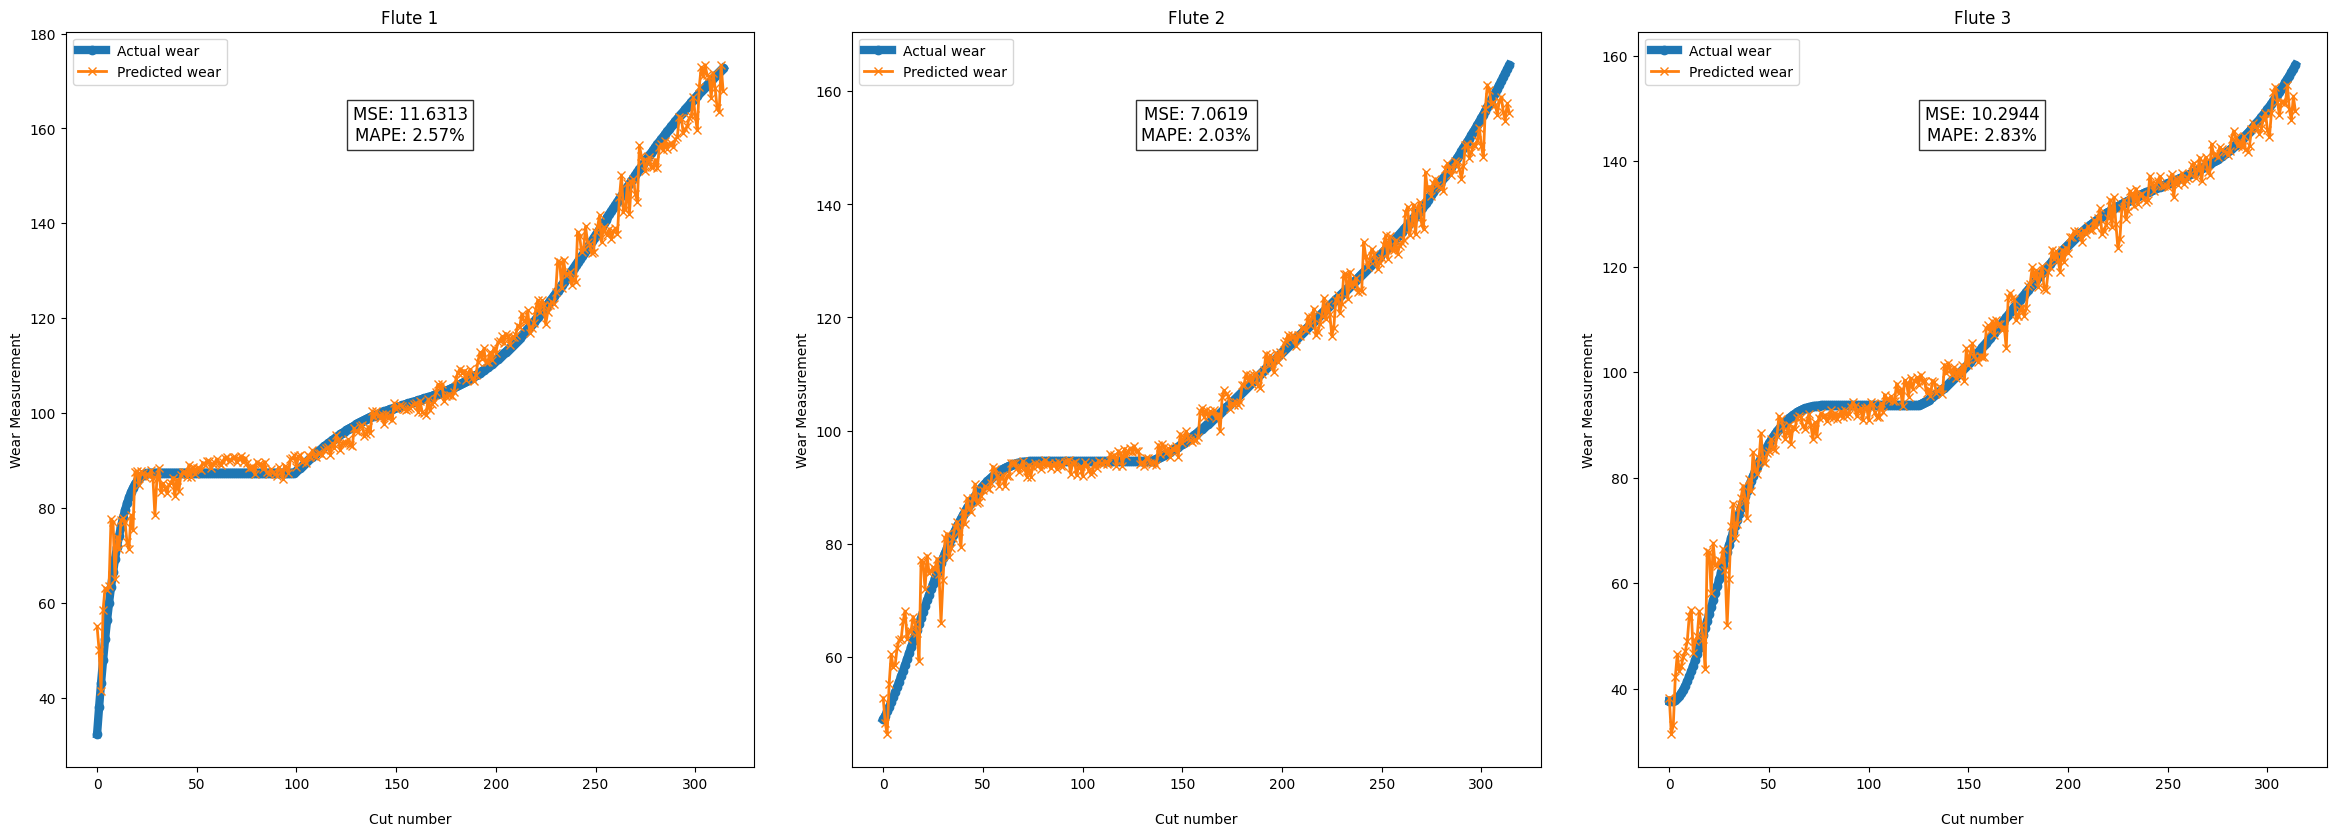

In [100]:
plot_predictions(y, y_pred)

In [101]:
best_lasso = best_pipeline.named_steps["lasso"]

In [102]:
sorted_features = [
    features.columns[np.argsort(-np.abs(coefs))] for coefs in best_lasso.coef_
]

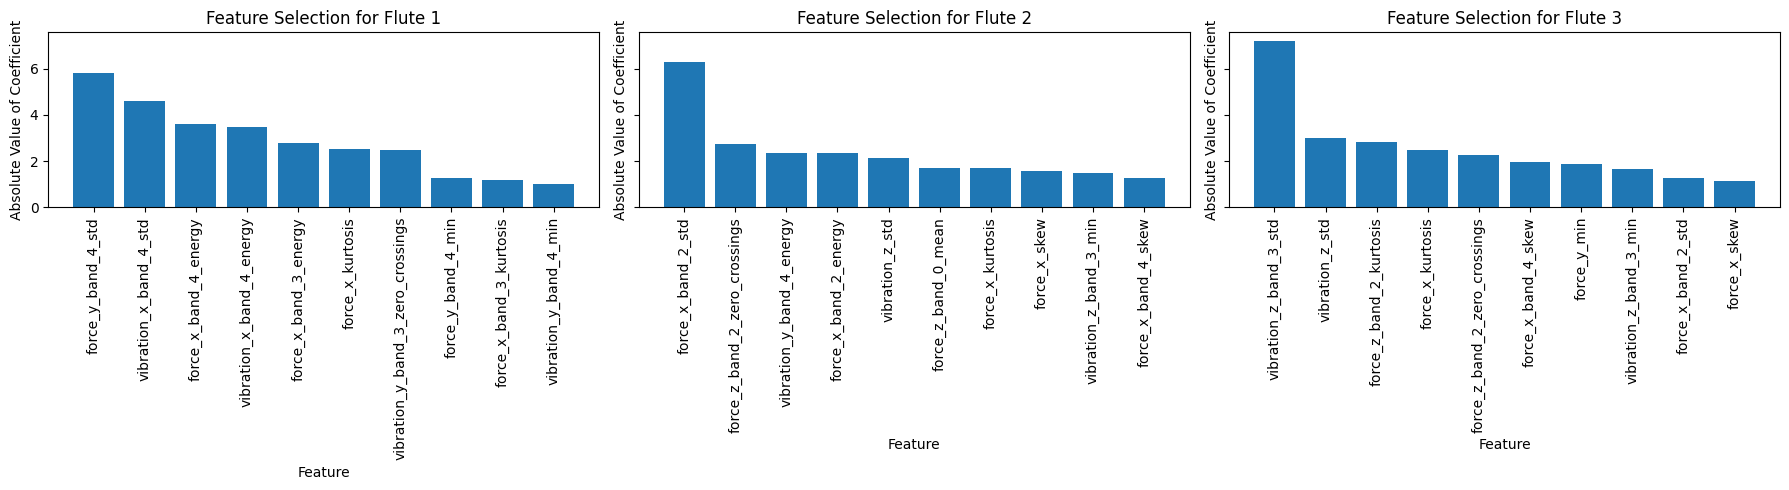

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, coefs in enumerate(best_lasso.coef_):
    ax = axes[i]
    ax.bar(sorted_features[i][:10], -np.sort(-np.abs(coefs))[:10])
    ax.set_title(f"Feature Selection for Flute {i + 1}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Absolute Value of Coefficient")
    ax.set_xticks(range(len(sorted_features[i][:10])))
    ax.set_xticklabels(sorted_features[i][:10], rotation=90)

plt.tight_layout()
plt.show()

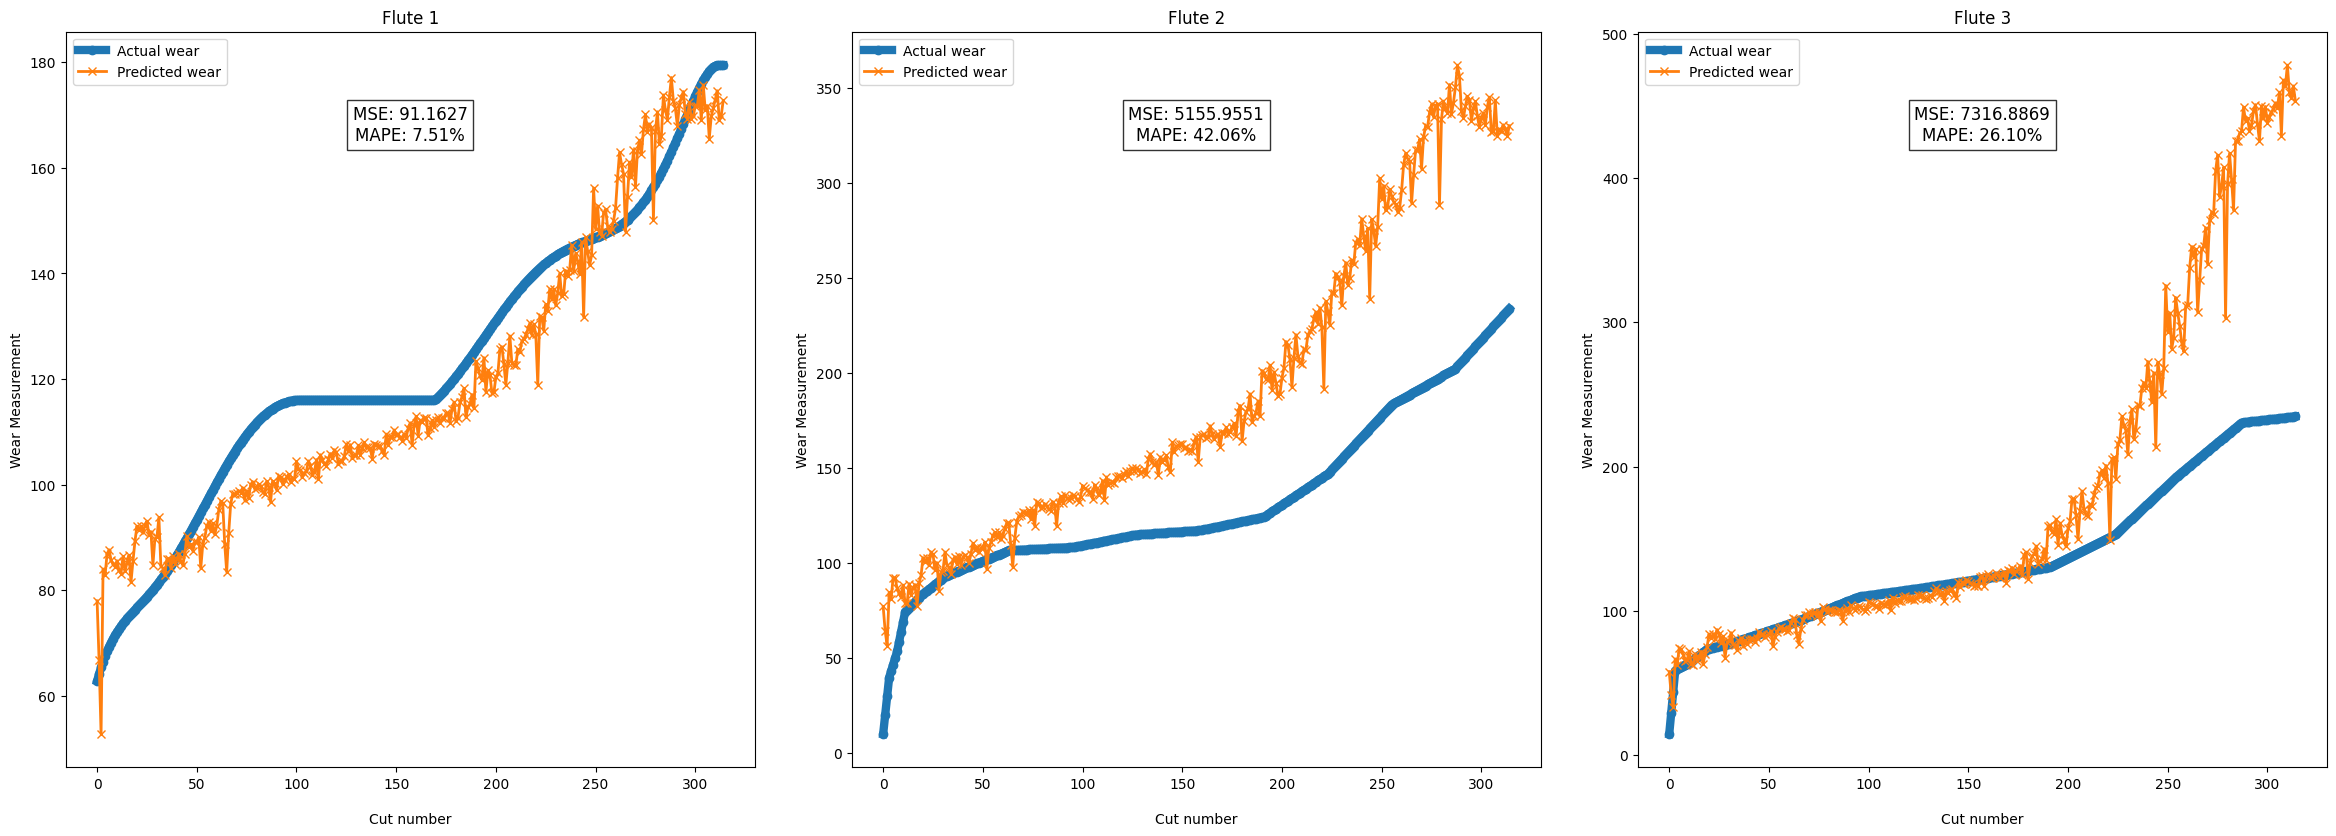

In [106]:
features_c6 = pd.read_csv("/content/drive/MyDrive/ML project/c6/c6_features.csv")
wears_c6 = pd.read_csv("/content/drive/MyDrive/ML project/c6/c6_wear.csv")


plot_predictions(
    wears_c6.drop(columns=["cut"]).values, best_pipeline.predict(features_c6.values)
)

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time
import matplotlib.pyplot as plt

In [2]:
class CNN(nn.Module):
    def __init__(self, input_channels, cnn_filters) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv1d(input_channels, cnn_filters, kernel_size=3),
            nn.ReLU(),
            nn.Conv1d(cnn_filters, cnn_filters, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(cnn_filters, out_channels=cnn_filters, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Dropout(p=0.5),
            nn.Conv1d(cnn_filters, 3, kernel_size=3),
            nn.AdaptiveAvgPool1d(1),
        )

    def forward(self, x):
        x = self.features(x)
        return x.squeeze(-1)

In [3]:
class CNCDataset(Dataset):
    def __init__(self, data_dir, wear_file, scaler=None, max_seq_length=None):
        self.data_dir = data_dir
        self.scaler = scaler
        self.max_seq_length = max_seq_length
        self.wear_data = pd.read_csv(wear_file).drop("cut", axis=1).values
        self.signal_files = sorted(
            [f for f in os.listdir(data_dir) if f.endswith(".csv")]
        )

    def __len__(self):
        return len(self.signal_files)

    def __getitem__(self, idx):
        signal_file = os.path.join(self.data_dir, self.signal_files[idx])
        signal_df = pd.read_csv(signal_file)
        signals = signal_df.values

        if self.scaler:
            signals = self.scaler.transform(signals)

        signals_tensor = torch.tensor(signals, dtype=torch.float32).permute(1, 0)
        # Padding to max sequence length
        if self.max_seq_length is not None:
            padding_size = self.max_seq_length - signals_tensor.shape[1]
            if padding_size > 0:
                signals_tensor = torch.nn.functional.pad(
                    signals_tensor, (0, padding_size)
                )

        wear_target = torch.tensor(self.wear_data[idx], dtype=torch.float32).squeeze()

        return {
            "signals": signals_tensor,
            "wear_target": wear_target,
              }


def load_and_preprocess_signals(data_dir):
    all_signals = []
    max_seq_length = 0
    for file in os.listdir(data_dir):
        if file.endswith(".csv"):
            signal_data = pd.read_csv(os.path.join(data_dir, file)).values
            all_signals.append(signal_data)
            max_seq_length = max(max_seq_length, signal_data.shape[0])
    all_signals = np.vstack(all_signals)
    return all_signals, max_seq_length

In [4]:
def train_one_epoch(
    model, data_loader, criterion, optimizer, device, accumulation_steps=4
):
    model.train()
    epoch_loss = 0.0

    for i, batch in enumerate(data_loader):
        optimizer.zero_grad()

        signals = batch["signals"].to(device)
        wear_target = batch["wear_target"].to(device)

        output = model(signals)

        loss = criterion(output, wear_target)
        loss.backward()

        optimizer.step()
        epoch_loss += loss.item()

    return epoch_loss / len(data_loader)


def validate_one_epoch(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            signals = batch["signals"].to(device)
            wear_target = batch["wear_target"].to(device)

            output = model(signals)

            loss = criterion(output, wear_target)
            epoch_loss += loss.item()

    return epoch_loss / len(data_loader)


def save_model(model, epoch, path="model.pth"):
    torch.save({"epoch": epoch, "model_state_dict": model.state_dict()}, path)

In [10]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time
import matplotlib.pyplot as plt

class CNCDataset(Dataset):
    def __init__(self, data_dir, wear_file, scaler=None, max_seq_length=None):
        self.data_dir = data_dir
        self.scaler = scaler
        self.max_seq_length = max_seq_length
        self.wear_data = pd.read_csv(wear_file).drop("cut", axis=1).values
        self.signal_files = sorted(
            [f for f in os.listdir(data_dir) if f.endswith(".csv")]
        )

    def __len__(self):
        return len(self.signal_files)

    def __getitem__(self, idx):
        signal_file = os.path.join(self.data_dir, self.signal_files[idx])
        signal_df = pd.read_csv(signal_file)
        signals = signal_df.values

        if self.scaler:
            signals = self.scaler.transform(signals)

        signals_tensor = torch.tensor(signals, dtype=torch.float32).permute(1, 0)
        # Padding to max sequence length
        if self.max_seq_length is not None:
            padding_size = self.max_seq_length - signals_tensor.shape[1]
            if padding_size > 0:
                signals_tensor = torch.nn.functional.pad(
                    signals_tensor, (0, padding_size)
                )

        wear_target = torch.tensor(self.wear_data[idx], dtype=torch.float32).squeeze()

        return {
            "signals": signals_tensor,
            "wear_target": wear_target,
              }


def load_and_preprocess_signals(data_dir):
    all_signals = []
    max_seq_length = 0
    for file in os.listdir(data_dir):
        if file.endswith(".csv"):
            signal_data = pd.read_csv(os.path.join(data_dir, file)).values
            all_signals.append(signal_data)
            max_seq_length = max(max_seq_length, signal_data.shape[0])
    all_signals = np.vstack(all_signals)
    return all_signals, max_seq_length

train_data_dir = "/content/drive/MyDrive/ML project/c1/c1"
train_wear_file = "/content/drive/MyDrive/ML project/c1/c1_wear.csv"
valid_data_dir = "/content/drive/MyDrive/ML project/c4/c4"
valid_wear_file = "/content/drive/MyDrive/ML project/c4/c4_wear.csv"


train_signals, max_seq_length_train = load_and_preprocess_signals(train_data_dir)
# scaler = MinMaxScaler(feature_range=(0, 1)) # StanddardScaler worked better here
scaler = StandardScaler()
scaler.fit(train_signals)

train_dataset = CNCDataset(
    data_dir=train_data_dir,
    wear_file=train_wear_file,
    scaler=scaler,
    max_seq_length=max_seq_length_train,
)
valid_dataset = CNCDataset(
    data_dir=valid_data_dir,
    wear_file=valid_wear_file,
    scaler=scaler,
    max_seq_length=max_seq_length_train,
)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=5, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CNN(nn.Module):
    def __init__(self, input_channels, cnn_filters) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv1d(input_channels, cnn_filters, kernel_size=3),
            nn.ReLU(),
            nn.Conv1d(cnn_filters, cnn_filters, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(cnn_filters, out_channels=cnn_filters, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Dropout(p=0.5),
            nn.Conv1d(cnn_filters, 3, kernel_size=3),
            nn.AdaptiveAvgPool1d(1),
        )

    def forward(self, x):
        x = self.features(x)
        return x.squeeze(-1)

def train_one_epoch(
    model, data_loader, criterion, optimizer, device, accumulation_steps=4
):
    model.train()
    epoch_loss = 0.0

    for i, batch in enumerate(data_loader):
        optimizer.zero_grad()

        signals = batch["signals"].to(device)
        wear_target = batch["wear_target"].to(device)

        output = model(signals)

        loss = criterion(output, wear_target)
        loss.backward()

        optimizer.step()
        epoch_loss += loss.item()

    return epoch_loss / len(data_loader)


def validate_one_epoch(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            signals = batch["signals"].to(device)
            wear_target = batch["wear_target"].to(device)

            output = model(signals)

            loss = criterion(output, wear_target)
            epoch_loss += loss.item()

    return epoch_loss / len(data_loader)


def save_model(model, epoch, path="model.pth"):
    torch.save({"epoch": epoch, "model_state_dict": model.state_dict()}, path)


model = CNN(input_channels=7, cnn_filters=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.002)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.8, patience=10
)
criterion = nn.MSELoss()

num_epochs = 500
save_interval = 10

for epoch in range(num_epochs):
    start_time = time.time()

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    valid_loss = validate_one_epoch(model, valid_loader, criterion, device)

    scheduler.step(valid_loss)

    # Save the model only every 50 epochs
    if (epoch + 1) % save_interval == 0:
        save_path = f"model_epoch_{epoch+1}.pth"
        save_model(model, epoch, save_path)
        print(f"Model saved at epoch {epoch+1}")

    epoch_duration = time.time() - start_time
    minutes, seconds = divmod(epoch_duration, 60)

    print(
        f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}, Learning Rate: {optimizer.param_groups[0]['lr']:.3f}, Time: {int(minutes)} min {int(seconds)} sec"
    )

Epoch 1/500, Train Loss: 1047.9418, Validation Loss: 416.2669, Learning Rate: 0.002, Time: 38 min 2 sec


In [ ]:
def load_latest_model(model, model_dir, device):
    model_files = [f for f in os.listdir(model_dir) if f.endswith(".pth")]

    if not model_files:
        raise ValueError("No model files found in the directory!")

    # Extract the epoch number from the file names (assuming format 'model_epoch_X.pth')
    model_epochs = [int(f.split("_epoch_")[1].split(".")[0]) for f in model_files]

    latest_epoch = max(model_epochs)
    latest_model_file = f"model_epoch_{latest_epoch}.pth"

    model_path = os.path.join(model_dir, latest_model_file)
    checkpoint = torch.load(model_path, map_location=device)

    model.load_state_dict(checkpoint["model_state_dict"])

    print(f"Loaded model from {latest_model_file} (Epoch {checkpoint['epoch']})")

    return model


model_dir = (
    "./weights/lr0.002p0.5/"  # Replace with the directory containing the saved models
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN(input_channels=7, cnn_filters=128).to(device)

model = load_latest_model(model, model_dir, device)

In [ ]:
def run_inference(model, data_loader, device):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch in data_loader:
            signals = batch["signals"].to(device)

            output = model(signals)

            predictions.append(output.cpu().numpy())

    predictions = np.vstack(predictions)

    return predictions

In [ ]:
def plot_true_vs_pred(true_vals, pred_vals, flute):
    true_vals = np.array(true_vals)
    pred_vals = np.array(pred_vals)

    plt.figure(figsize=(10, 6))

    plt.plot(
        true_vals[:, flute - 1],
        label=f"True wear on flute {flute}",
        linestyle="-",
        marker="o",
    )
    plt.plot(
        pred_vals[:, flute - 1],
        label=f"Predicted wear on flute {flute}",
        linestyle="--",
        marker="x",
    )

    plt.title("True vs Predicted Wear Values for Each Flute")
    plt.xlabel("Cut")
    plt.ylabel(r"Wear $(\mu m)$")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
test_data_dir = "/content/drive/MyDrive/ML project/c1/c1"
test_wear_file = "/content/drive/MyDrive/ML project/c1/c1_wear.csv"

test_dataset = CNCDataset(
    data_dir=test_data_dir, wear_file=test_wear_file, scaler=scaler
)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
predictions = run_inference(model, test_loader, device)
real_wear_data = pd.read_csv(test_wear_file).drop("cut", axis=1).values
plot_true_vs_pred(real_wear_data, predictions, 1)

In [ ]:
streamlit_data = df = pd.DataFrame()
streamlit_data[["c1w1", "c1w2", "c1w3"]] = real_wear_data
streamlit_data[["c1w1p", "c1w2p", "c1w3p"]] = predictions
test_data_dir = "/content/drive/MyDrive/ML project/c4/c4"  # Directory with test signals
test_wear_file = (
    "/content/drive/MyDrive/ML project/c4/c4_wear.csv"  # Wear data file (if you have true labels for testing)
)

test_dataset = CNCDataset(
    data_dir=test_data_dir, wear_file=test_wear_file, scaler=scaler
)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
predictions = run_inference(model, test_loader, device)
real_wear_data = pd.read_csv(test_wear_file).drop("cut", axis=1).values
streamlit_data[["c4w1", "c4w2", "c4w3"]] = real_wear_data
streamlit_data[["c4w1p", "c4w2p", "c4w3p"]] = predictions

In [ ]:
test_data_dir = "/content/drive/MyDrive/ML project/c6/c6"  # Directory with test signals
test_wear_file = "/content/drive/MyDrive/ML project/c6/c6_wear.csv"

test_dataset = CNCDataset(
    data_dir=test_data_dir, wear_file=test_wear_file, scaler=scaler
)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
predictions = run_inference(model, test_loader, device)
real_wear_data = pd.read_csv(test_wear_file).drop("cut", axis=1).values
streamlit_data[["c6w1", "c6w2", "c6w3"]] = real_wear_data
streamlit_data[["c6w1p", "c6w2p", "c6w3p"]] = predictions
streamlit_data

In [ ]:
streamlit_data.to_csv("DL_C1.csv", index=False)